## Project 05
## Title: Will a person accept a coupon recommended to them in different driving scenarios?

Group member names and matriculation numbers:

1. Mayuri Mhetre - 468178
2. Nisha Kulhari - 471109
3. Rasika Vibhute 471850
4. Rewa Hingnekar - 469029
5. Zeba Rahman - 470454
   
---------------------
## A. Introduction


**Problem statement:**  
The given data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios, including the destination, current time, weather, and passengers. It then asks whether the driver will accept the coupon.

**Motivation for choosing this project:**    
Businesses frequently use targeted marketing strategies, with coupons serving as a common incentive to boost customer engagement and sales. The effectiveness of these coupons, however, depends on factors such as the customer's location, time of day, company, and personal preferences. By understanding the factors that influence a customer's decision to accept a coupon in various situations, businesses can optimize their promotional efforts.

**Our objective:**    
We aim to build a classification model to predict whether the coupon will be accepted or not in various driving scenarios based on customer and situational features. 

**Information on the dataset:** 

- Dataset Characteristics - Multivariate
- Subject Area            - Business
- Associated Tasks        - Classification
- Feature Type            - Categorical, Integer
- Instances in dataset    - 12684
- Features in dataset     - 25
- Has Missing Values?     - Yes
- Currency                - $ (USD)

**Information on the features:** 

**Note:** We use the original feature names from the dataset for consistency, even if they contain spelling errors (e.g., 'passanger' instead of 'passenger'). Additionally, monetary values in the dataset are represented with '$', but we use 'USD' in the comments to avoid Jupyter Notebook formatting issues.

- `destination` : No Urgent Place, Home, Work
- `passanger` : Alone, Friend(s), Kid(s), Partner (feature meaning : Who are the passengers in the car?)
- `weather` : Sunny, Rainy, Snowy
- `temperature` : 30, 55, 80
- `time` : 7AM, 10AM, 2PM, 6PM, 10PM
- `coupon` : Restaurant( < 20 USD), Coffee House, Carry out & Take away, Bar, Restaurant(20-50 USD)
- `expiration` : 1d, 2h (feature meaning : The coupon expires in 1 day or in 2 hours?)
- `gender` : Female, Male
- `age` : below21, 21, 26, 31, 36, 41, 46, 50 plus
- `maritalStatus` : Unmarried partner, Single, Married partner, Divorced, Widowed
- `has_Children` : 1, 0 (feature meaning : Do you have children? Yes = 1, No = 0)
- `education` : Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- `occupation` : Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management,  Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- `income` : Less than 12500, 12500-24999, 25000-37499, 37500-49999, 50000-62499, 62500-74999, 75000-87499, 87500-99999, 100000 or More (in USD)
- `car` : Car that is too old to install Onstar, crossover, do not drive, Mazda5, Scooter and motorcycle
- `Bar` : never, less1, 1-3, 4-8, gt8 (feature meaning : How many times do you go to a bar every month?)
- `CoffeeHouse` : never, less1, 1-3, 4-8, gt8 (feature meaning : How many times do you go to a coffeehouse every month?)
- `CarryAway` : never, less1, 1-3, 4-8, gt8 (feature meaning : How many times do you get take-away food every month?)
- `RestaurantLessThan20` : never, less1, 1-3, 4-8, gt8 (feature meaning : How many times do you go to a restaurant with an average expense per person of less than 20 USD every month?)
- `Restaurant20To50` : never, less1, 1-3, 4-8, gt8 (feature meaning : How many times do you go to a restaurant with average expense per person of 20-50 USD every month?)
- `toCoupon_GEQ5min` : 1 (feature meaning : Is the driving distance to the restaurant/bar for using the coupon greater than 5 minutes? Yes = 1)
- `toCoupon_GEQ15min` : 1, 0 (feature meaning : Is the driving distance to the restaurant/bar for using the coupon greater than 15 minutes? Yes = 1, No = 0)
- `toCoupon_GEQ25min` : 1, 0 (feature meaning : Is the driving distance to the restaurant/bar for using the coupon greater than 25 minutes? Yes = 1, No = 0)
- `direction_same` : 1, 0 (feature meaning : Whether the restaurant/bar is in the same direction as your current destination? Yes = 1, No = 0)
- `direction_opp` : 1, 0 (feature meaning : Whether the restaurant/bar is in the same direction as your current destination? Yes = 1, No = 0)

**Information on target variable:**

- `Y` : 1, 0 (Whether the coupon is accepted? Yes = 1, No = 0)

**References used:** 
- Dataset from the repository:
  In-Vehicle Coupon Recommendation from UCI Machine Learning Repository. https://doi.org/10.24432/C5GS4P
- More information about the dataset, referred from the paper:
  Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille.
  'A Bayesian framework for learning rule sets for interpretable classification.'
  The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393. https://www.jmlr.org/papers/volume18/16-003/16-003.pdf

**Important note:**    
Depending on the user's laptop configuration, this notebook may take 10-25 minutes to run.

---------------------
## B. Importing libraries
In this section, we import the essential libraries required for initial data processing, numerical operations, and visualization tasks. Additional libraries will be imported as needed for specific tasks throughout the project. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-----------------
## C. Importing Dataset
In this section, we load the dataset into the notebook for further exploration and preprocessing. The dataset is imported as a pandas DataFrame, which will allow for efficient data manipulation and analysis.

In [2]:
# Import dataset
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [3]:
# Preview of the DataFrame
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Descriptive statistics for numerical columns
df.describe().round(decimals=2)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.00,12684.00,12684.0,12684.00,12684.00,12684.00,12684.00,12684.00
mean,63.30,0.41,1.0,0.56,0.12,0.21,0.79,0.57
std,19.15,0.49,0.0,0.50,0.32,0.41,0.41,0.50
min,30.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,55.00,0.00,1.0,0.00,0.00,0.00,1.00,0.00
50%,80.00,0.00,1.0,1.00,0.00,0.00,1.00,1.00
75%,80.00,1.00,1.0,1.00,0.00,0.00,1.00,1.00
max,80.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


**Basic observations on importing the dataset:**   
Upon importing the dataset, several key observations were made. The `car` column has a significant number of missing values, which will need to be handled during data preprocessing. Similarly, columns like `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, and `Restaurant20To50` also contain missing data that require attention.

Another important observation is that the `toCoupon_GEQ5min` column has a single unique value (1 = Yes), making it redundant and potentially unnecessary for analysis. Additionally, the `direction_same` and `direction_opp` columns are complementary, as the value in one column is the opposite of the other. Thus, only one of these columns may be needed for the model.

Finally, columns with the 'int64' data type, such as `age`, `income`, and others, seem to represent categorical values rather than continuous numerical data. These columns should be encoded appropriately before being used in machine learning models.

-----------------------
## D. Exploratory Data Analysis (EDA) of Numerical Features
In this section, we analyze the numerical features in the dataset to understand their distributions, potential outliers, relationships with the target variable, and overall trends. Visualizations such as count plots help in identifying skewness, spread, and the presence of extreme values. These insights guide data preprocessing, including potential transformations or outlier handling.

Notably, while these columns contain numerical values, they represent categorical information rather than continuous numerical data. Therefore, they will be encoded appropriately before being used in modeling.

numerical_features : ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


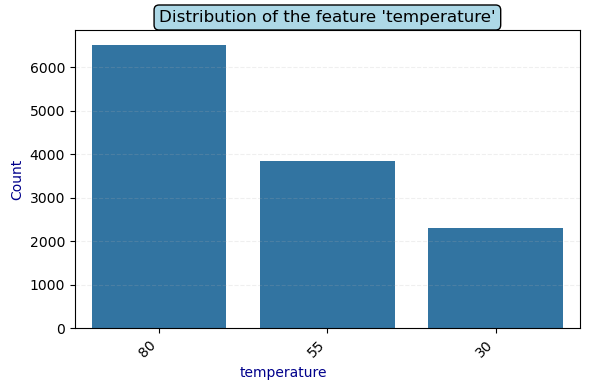

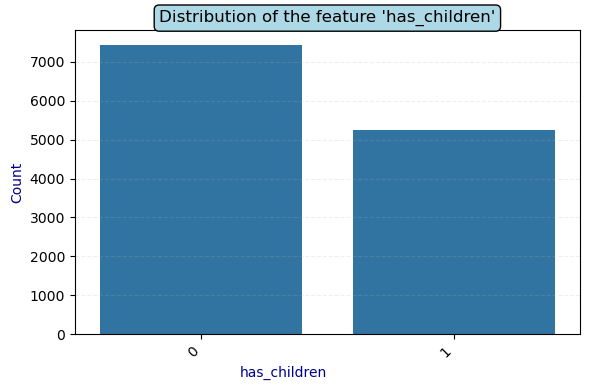

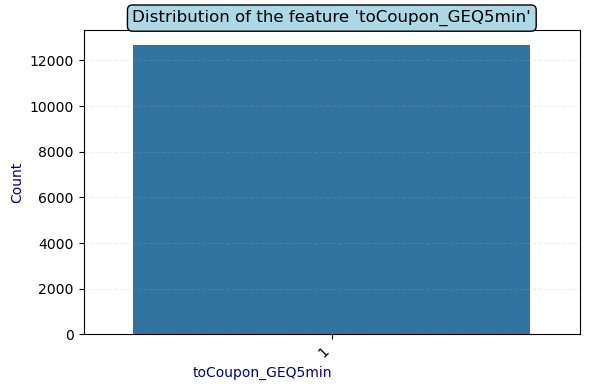

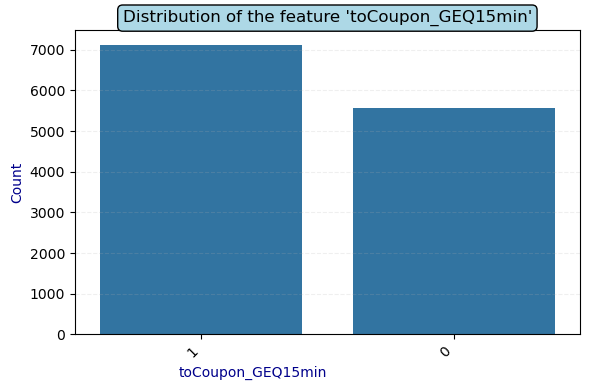

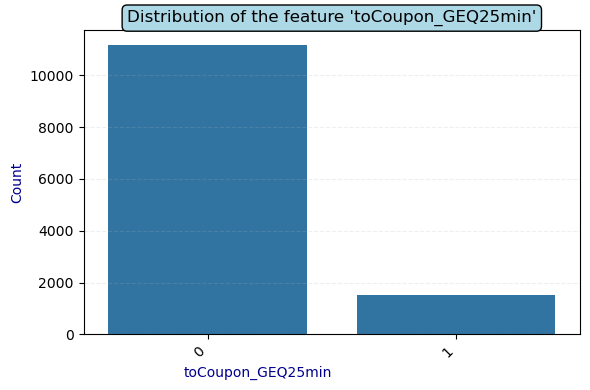

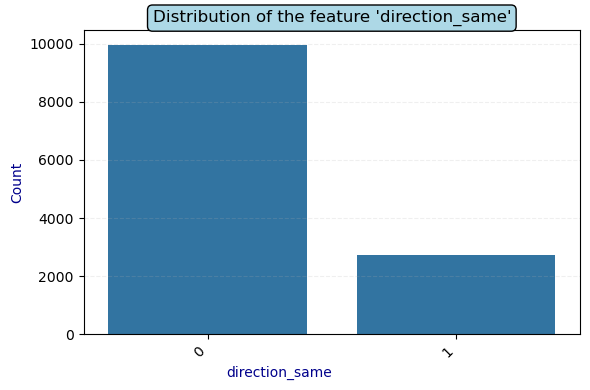

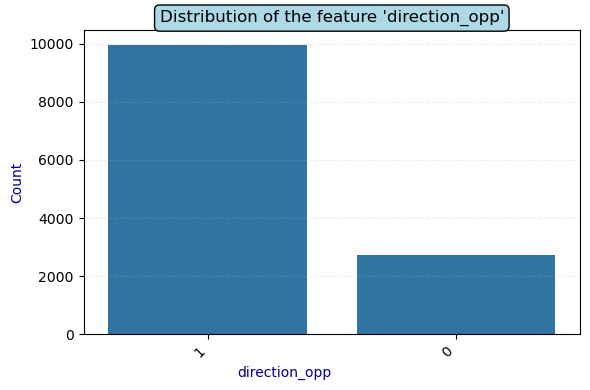

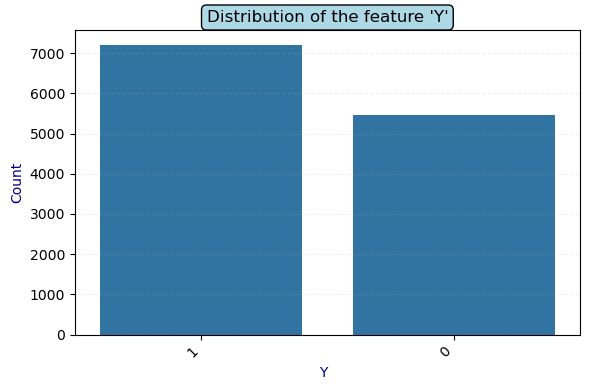

In [6]:
# Identify numerical features by selecting columns with data type 'int64'
numerical_features = df.select_dtypes(include=['int64']).columns

# Print the list of numerical features
print(f"numerical_features : {list(numerical_features)}")
    
# Loop through each numerical feature to visualize the distribution using a count plot
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f"Distribution of the feature '{feature}'", fontsize=12, bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    plt.xlabel(feature, ha='right', color="darkblue")
    plt.ylabel('Count', color="darkblue")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Remarks:**  
The count plots highlight the distribution of numerical features that are actually categorical. For instance, the distribution of the columns `toCoupon_GEQ25min`, `direction_same`, and `direction_opp` is imbalanced. Also, the column `toCoupon_GEQ5min` shows only one unique value (1 = Yes), making it redundant and suitable for removal. Similarly, the columns `direction_same` and `direction_opp` are complementary, as one is the inverse of the other, so one can be dropped to avoid redundancy. Due to insufficient domain knowledge and the categorical nature of all features, we cannot definitively identify outliers. Additionally, rare categories may represent meaningful patterns rather than true anomalies. Therefore, we retain the dataset as it is without removing any potential outliers. All column removals and missing value handling will be addressed in the preprocessing section to maintain a structured workflow.

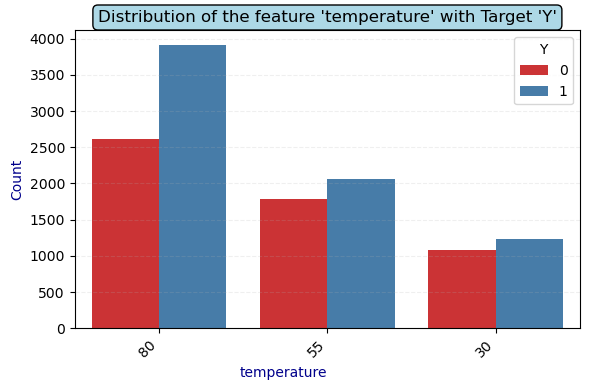

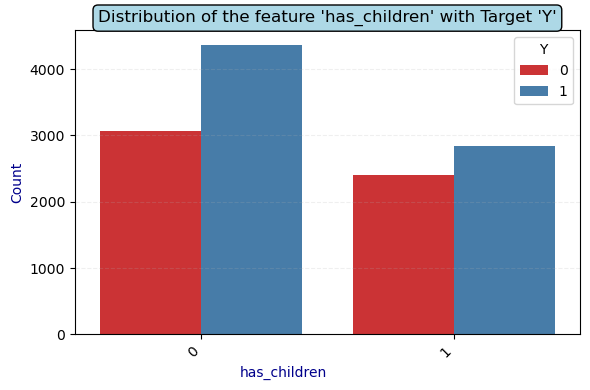

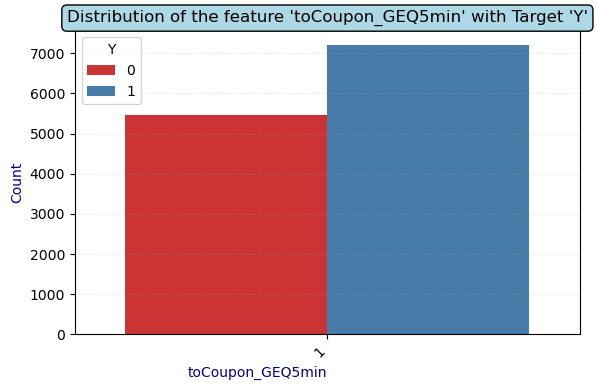

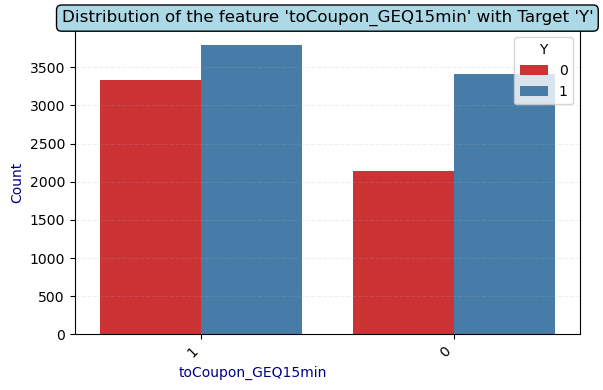

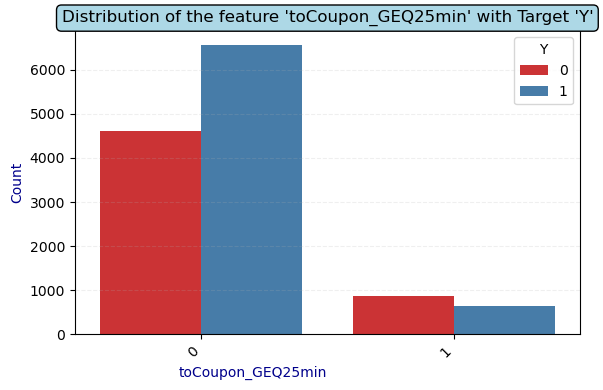

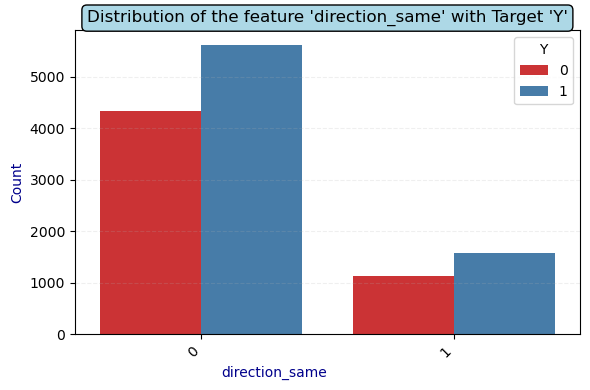

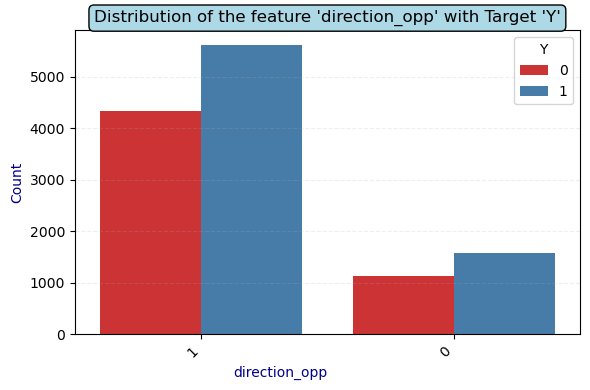

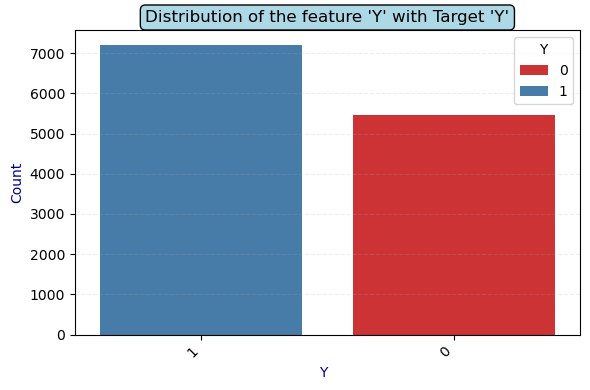

In [7]:
# Loop through each numerical feature to visualize the distribution with Target 'Y' using a count plot
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Y', order=df[feature].value_counts().index, palette='Set1')
    plt.title(f"Distribution of the feature '{feature}' with Target 'Y'", fontsize=12, bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    plt.xlabel(feature, ha='right', color="darkblue")
    plt.ylabel('Count', color="darkblue")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Remarks:**   
The count plots reveal how each numerical feature is distributed with respect to the target variable (coupon acceptance). By visualizing the frequency of different categories associated with different target outcomes, we can identify potential relationships. For example, `toCoupon_GEQ25min` shows that the majority of instances with '0' (No) acceptance are observed. Similarly, `direction_opp` indicates a preference for '1' (Yes) coupon acceptance, suggesting that the direction of the coupon’s location relative to the driver may influence the decision. Overall, the data seems slightly imbalanced for the target variable `Y`, with a higher count of 7210 for 'Y = 1' (Yes) and lower count of 5474 for 'Y = 0' (No).

---------------------
## E. Exploratory Data Analysis (EDA) of Categorical Features
This section visualizes the distribution of categorical features in the dataset using count plots. It helps identify the frequency of each category and observe potential relationships between features and the target variable (coupon acceptance). These insights can guide feature engineering decisions, such as merging rare categories, handling imbalanced distributions, or encoding strategies for machine learning models.

Categorical Features: ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


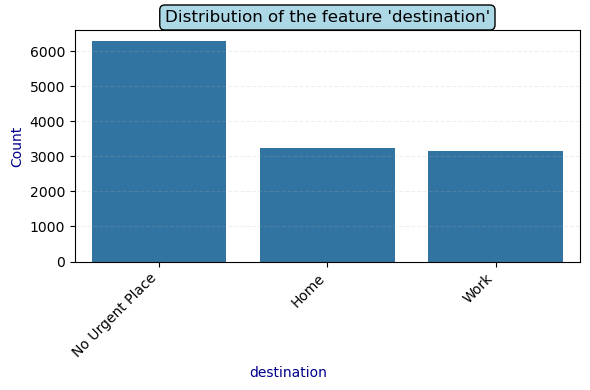

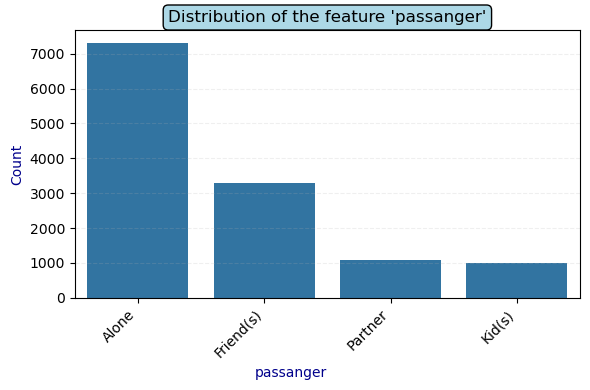

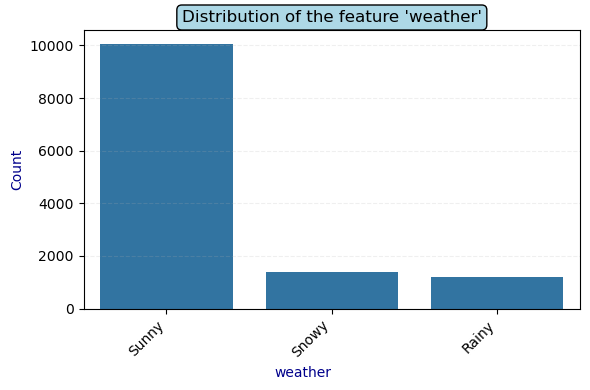

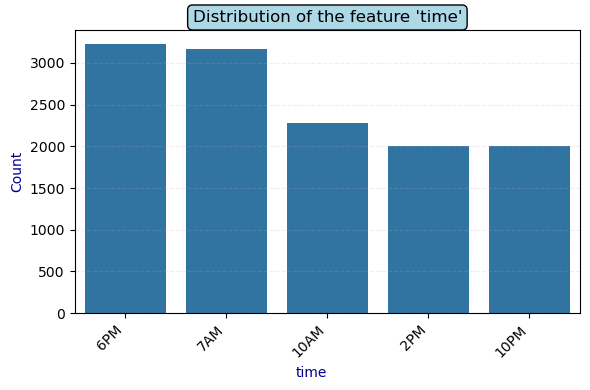

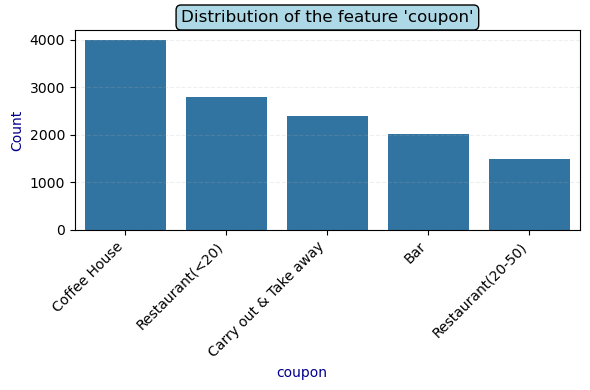

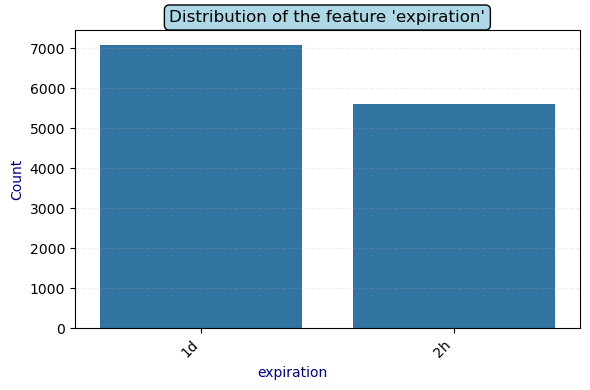

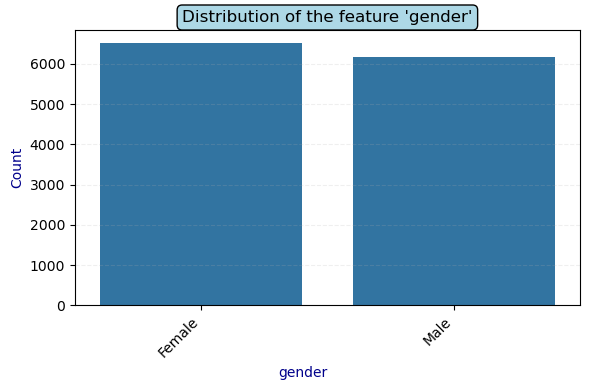

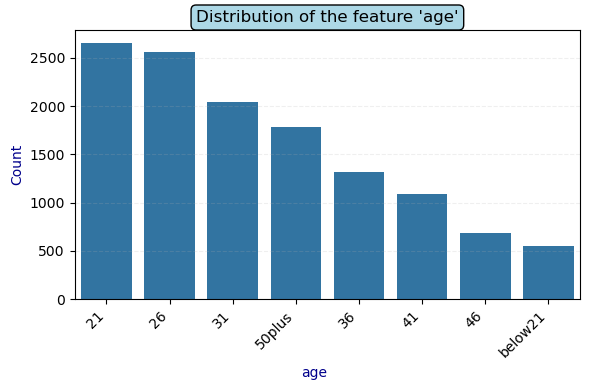

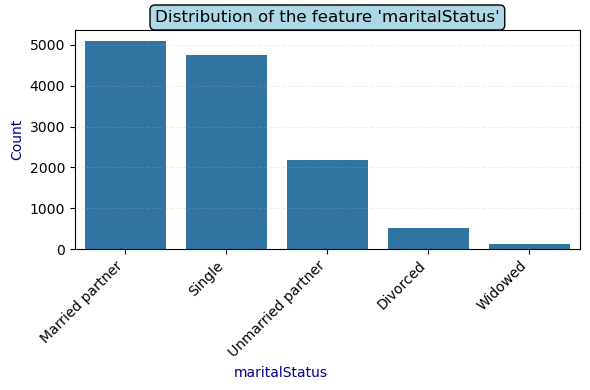

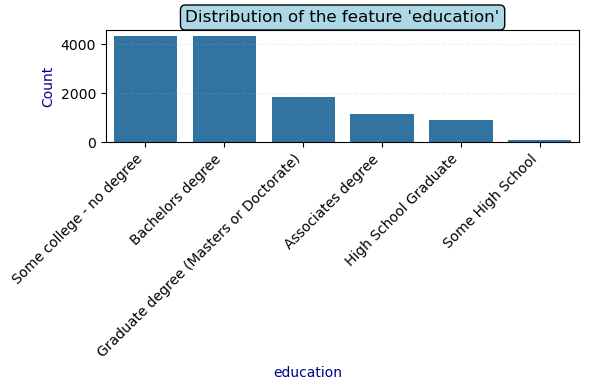

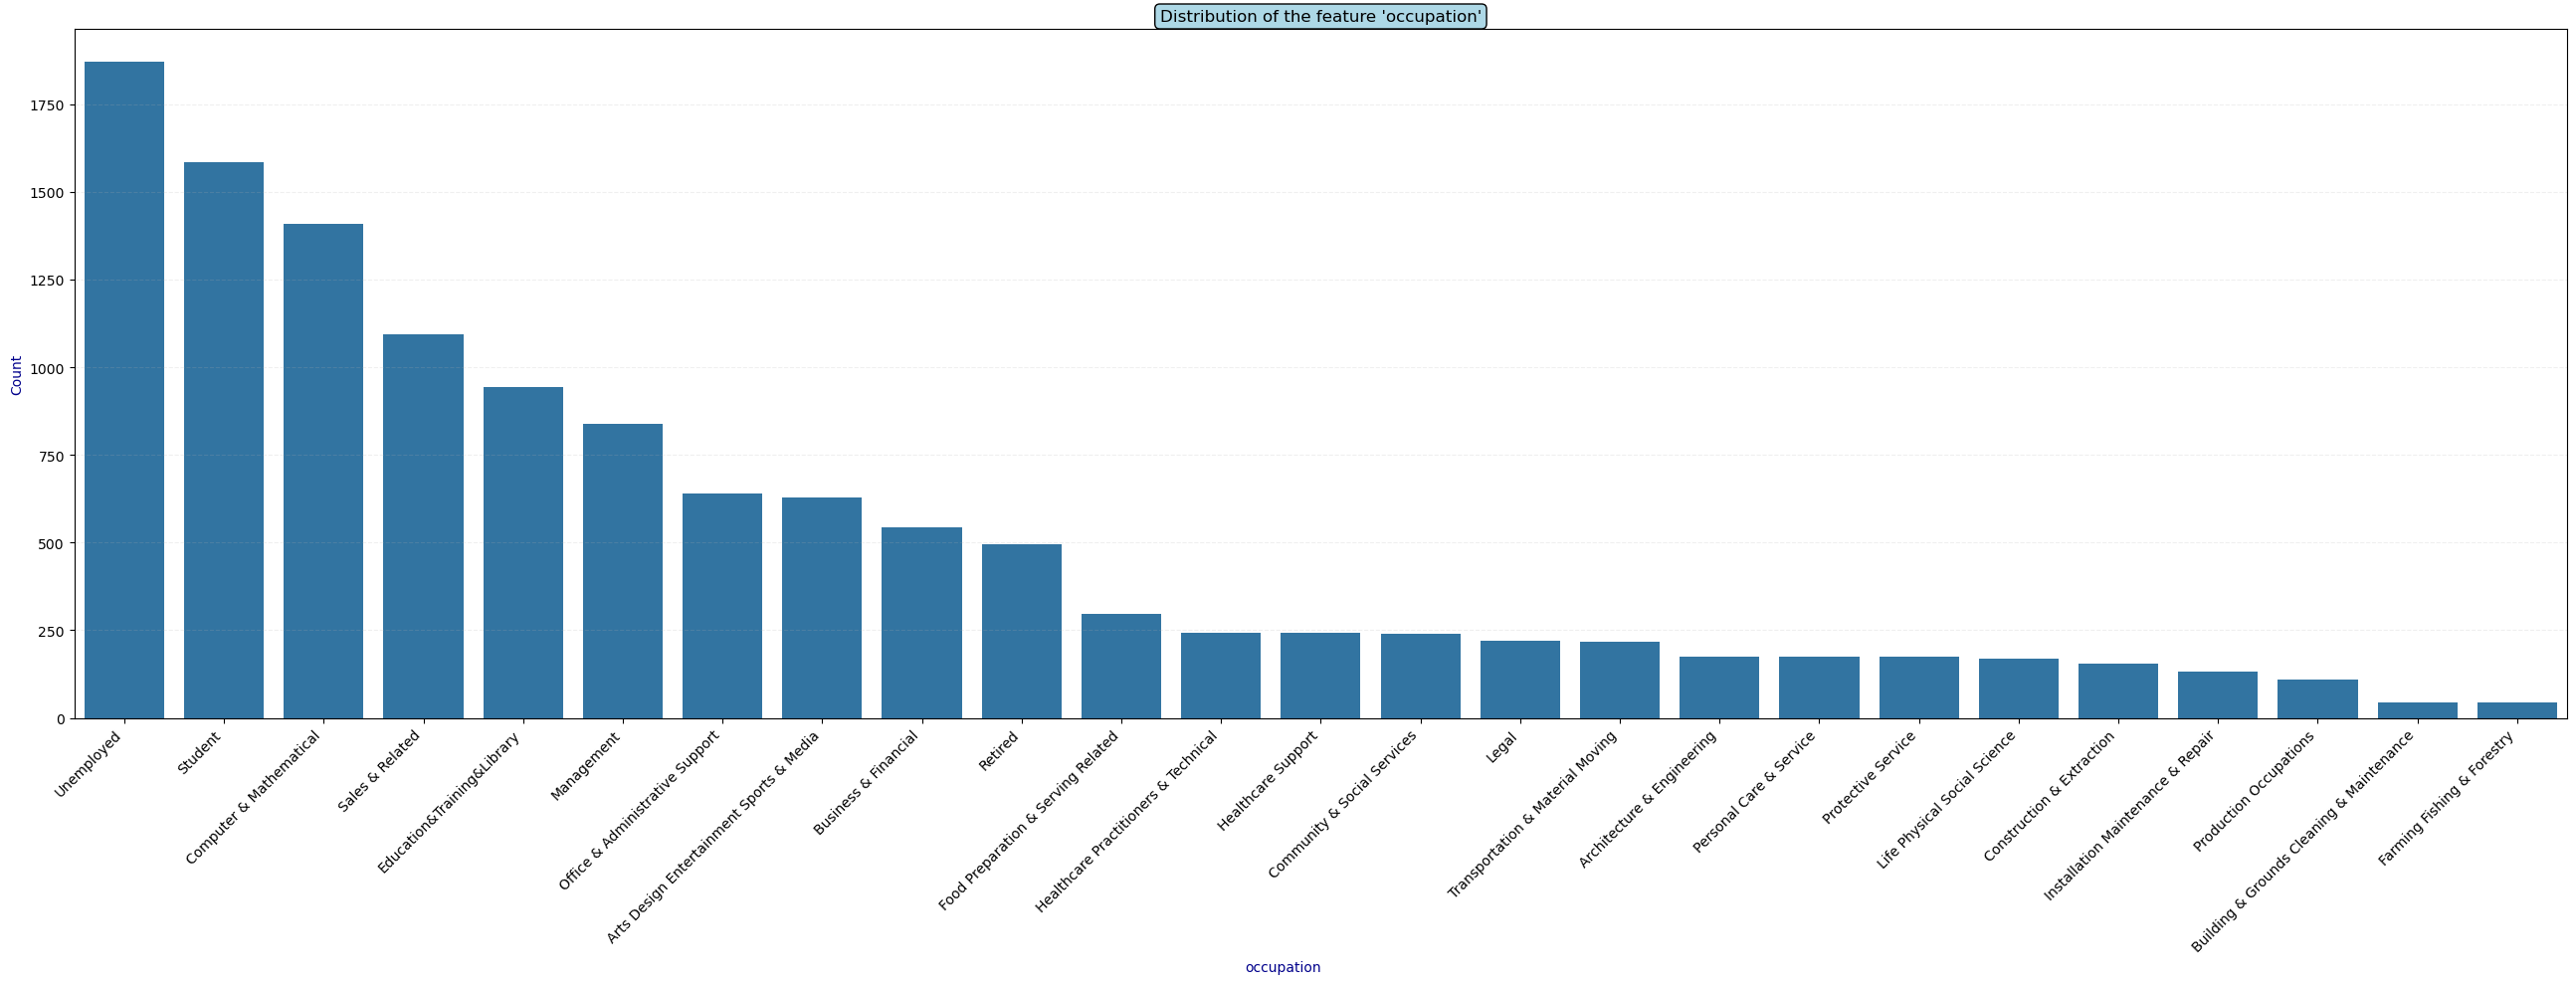

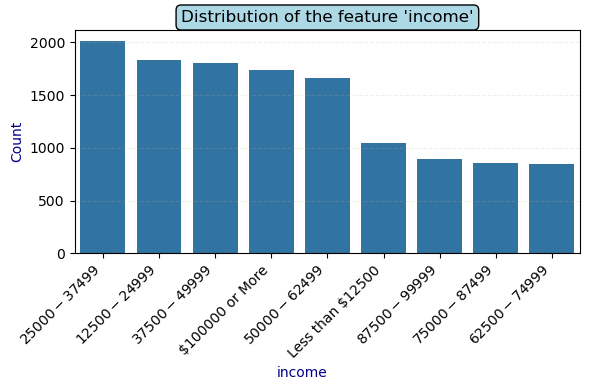

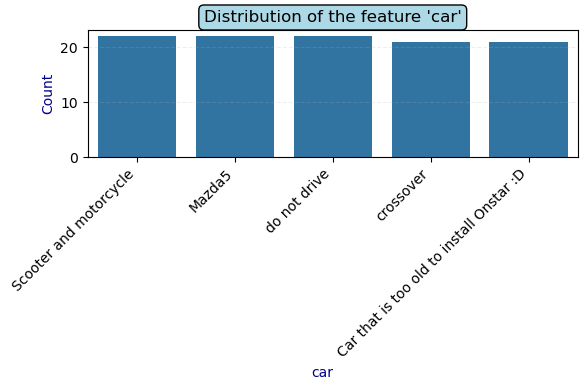

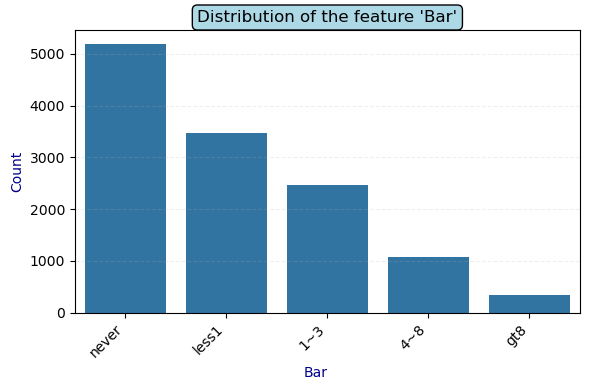

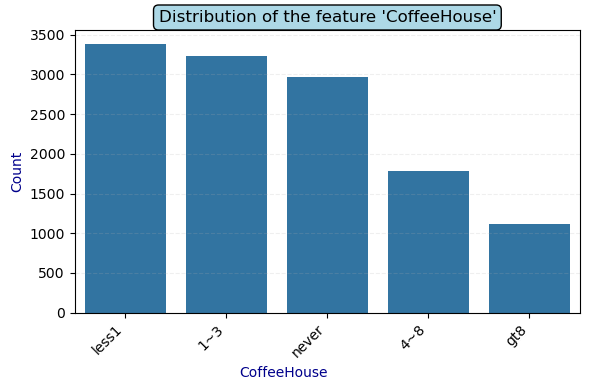

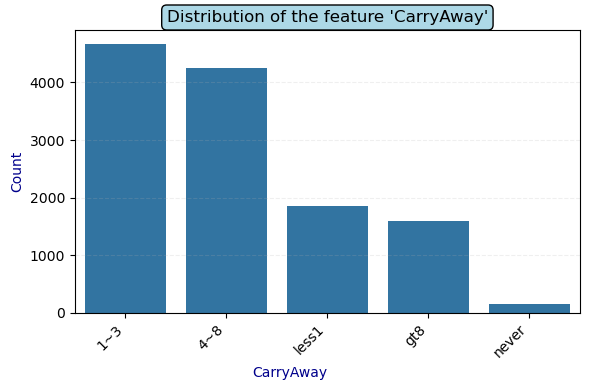

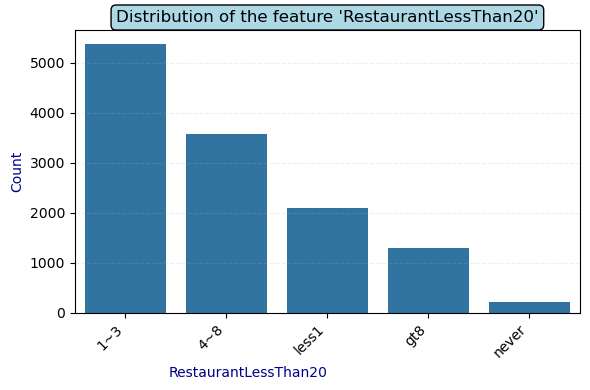

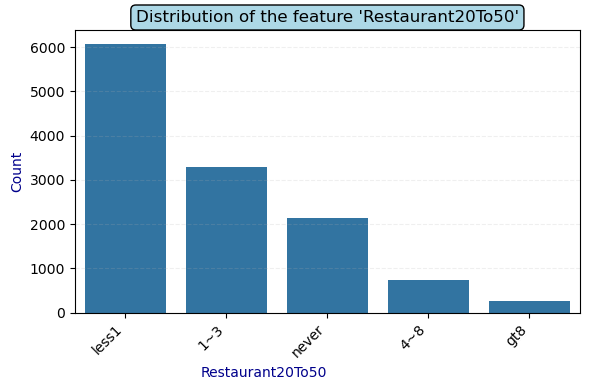

In [8]:
# Identify numerical features by selecting columns with data type 'object'
categorical_features = df.select_dtypes(include=['object']).columns

# Print the list of categorical features
print(f"Categorical Features: {list(categorical_features)}")

# Loop through each categorical feature to visualize the distribution using a count plot
for feature in categorical_features:
    if feature == 'occupation':
        plt.figure(figsize=(26, 10)) # Figure size of 'occupation' feature increased for better visualization
    else:
        plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f"Distribution of the feature '{feature}'", fontsize=12, bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    plt.xlabel(feature, ha='right', color="darkblue")
    plt.ylabel('Count', color="darkblue")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Remarks:**  
The count plots provide a clear visualization of the distribution of categorical features, showing the frequency of each category in the dataset. This allows us to quickly understand the spread of data and spot any imbalances or trends.  

For instance, the `occupation` feature, with 25 distinct categories, shows a diverse set of values. We also notice that some categories, like `education`, appear closely related to `occupation`, suggesting potential correlations that may warrant further investigation. Additionally, some of the columns, such as `weather`, `maritalStatus`, and `passenger`, appear imbalanced, which should be addressed during preprocessing to improve model performance and avoid bias.

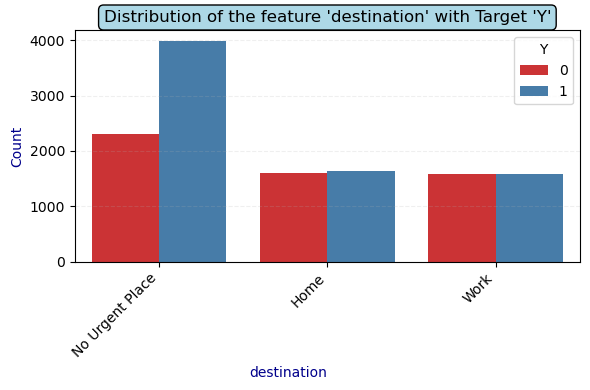

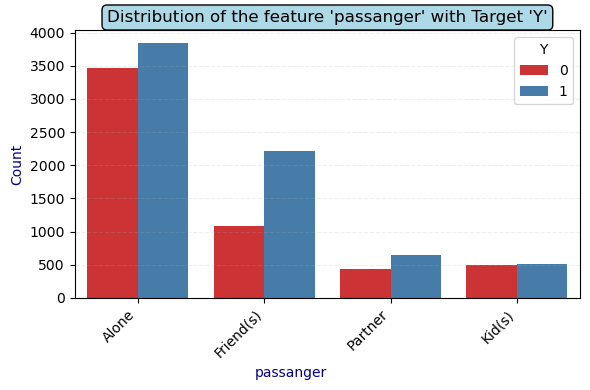

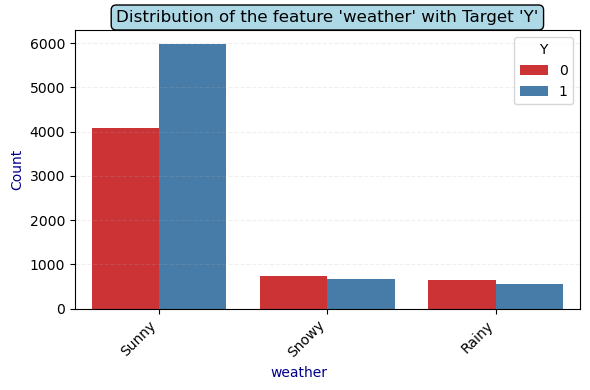

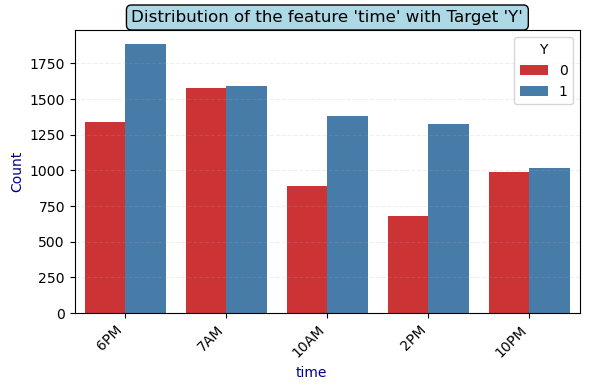

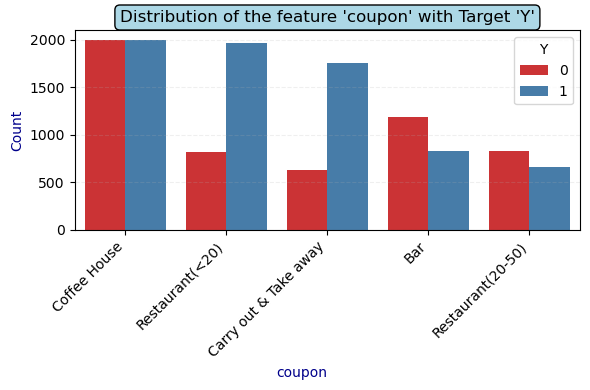

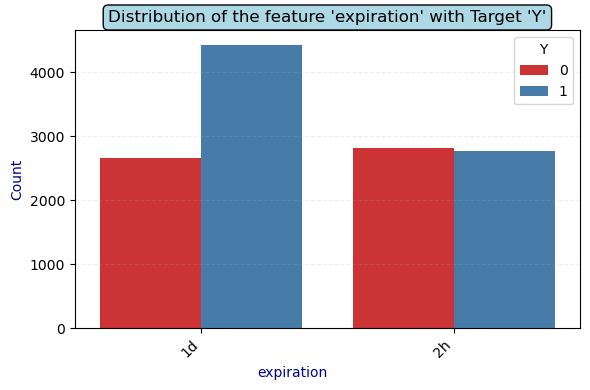

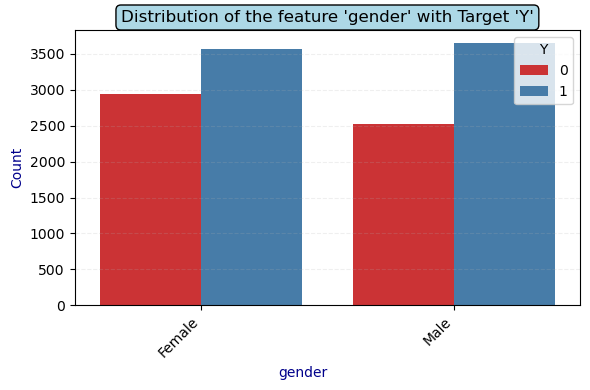

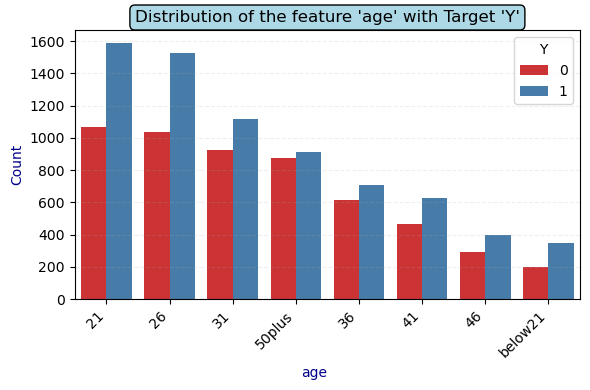

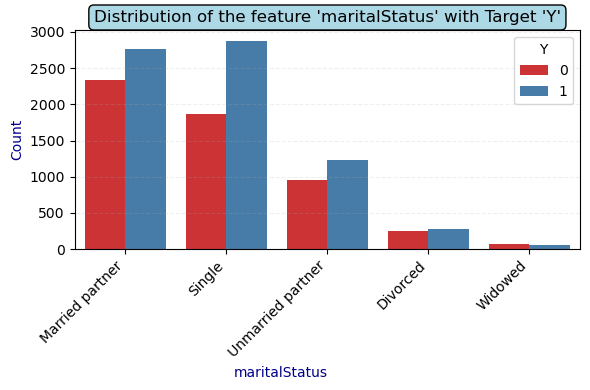

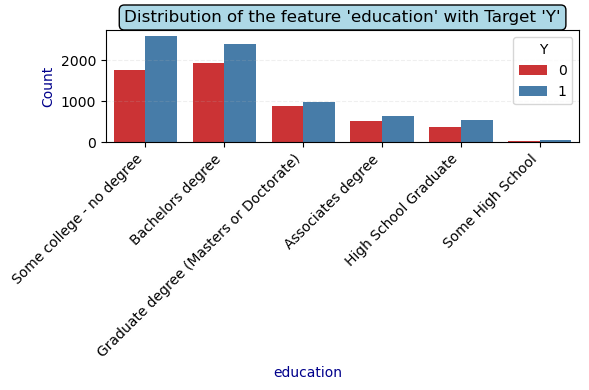

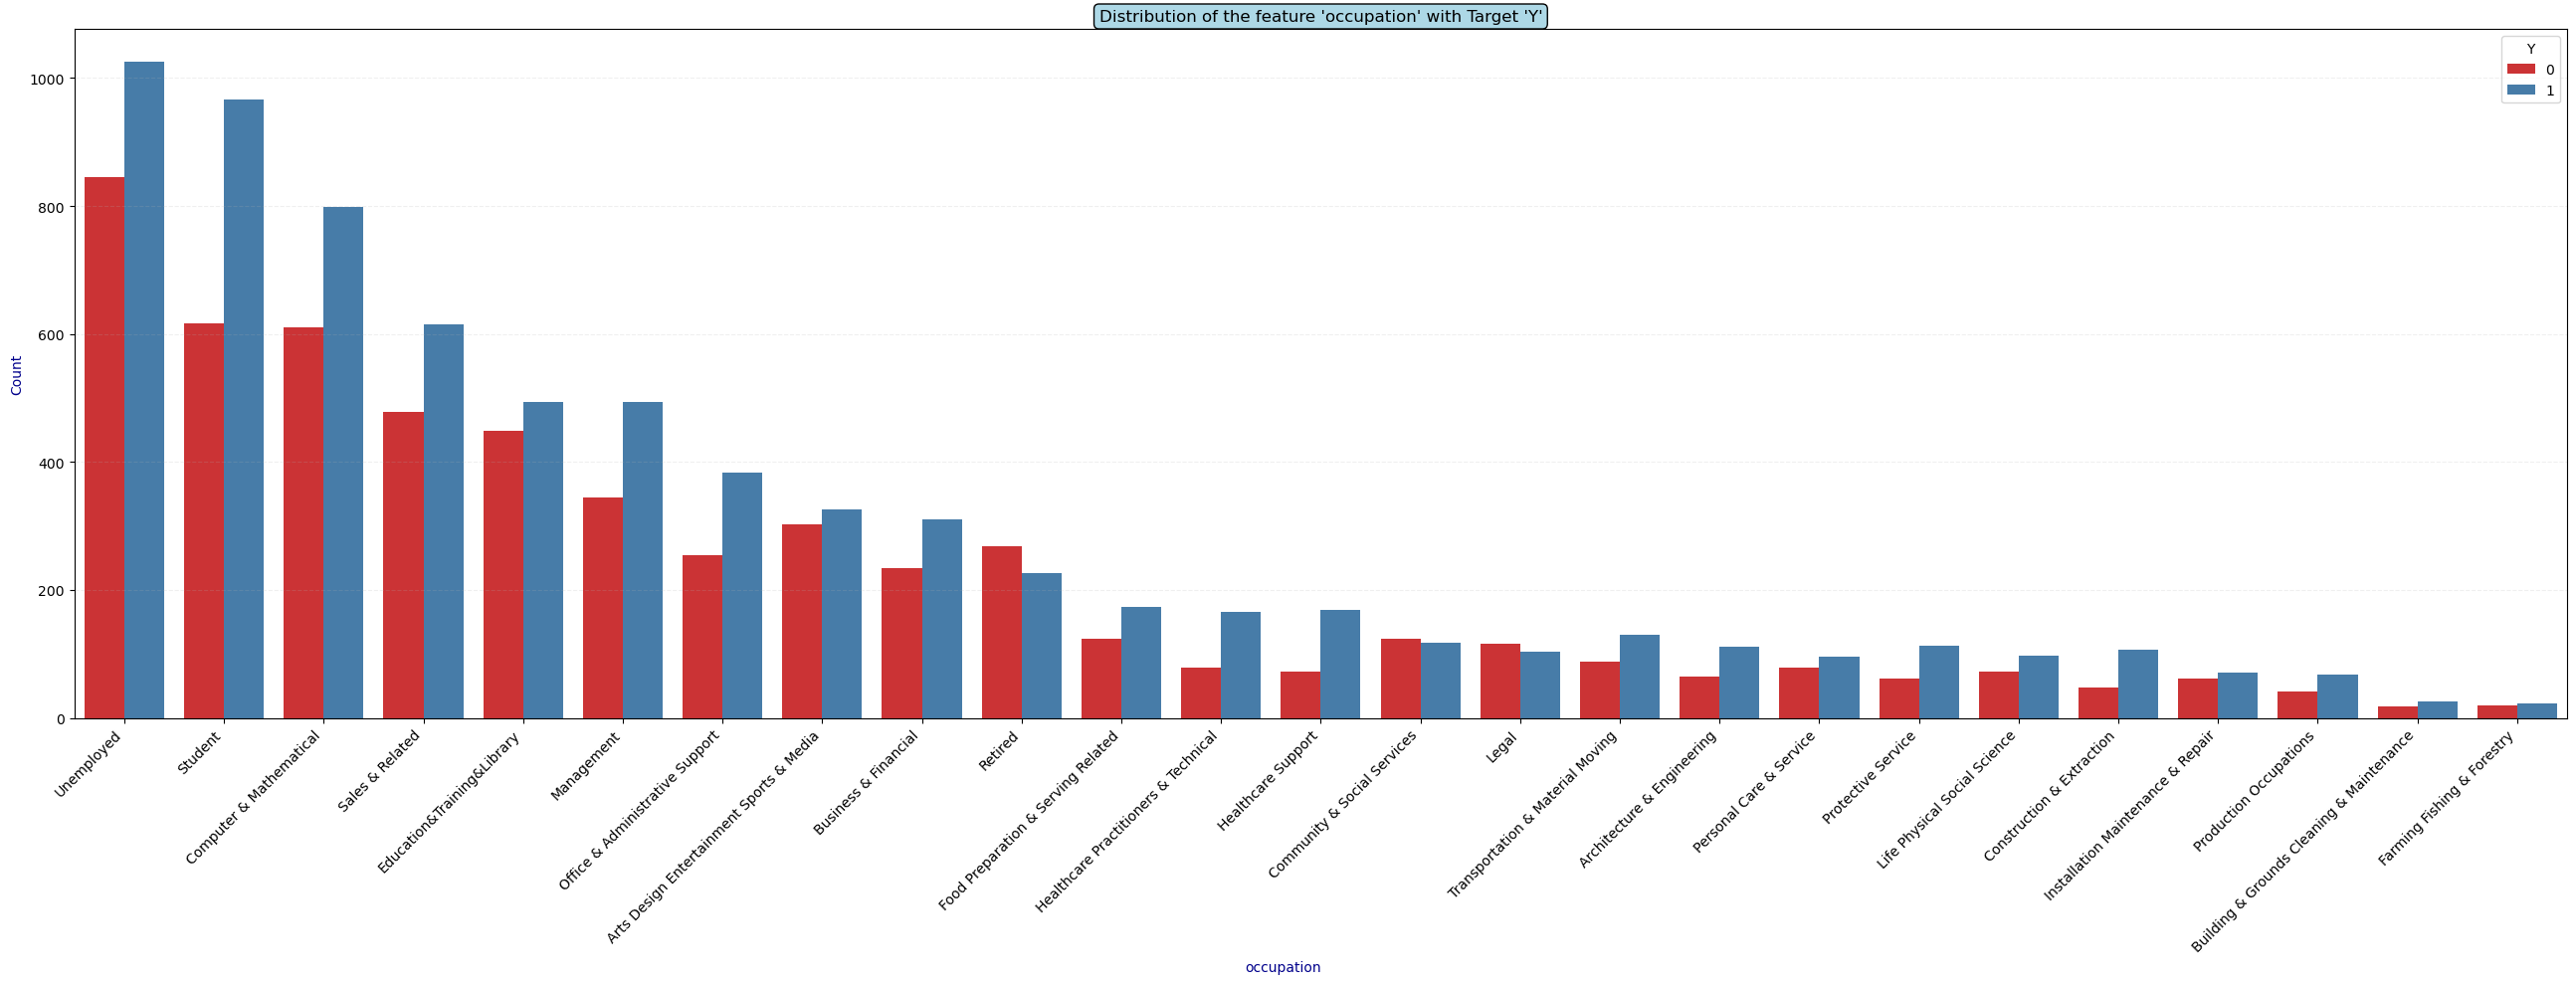

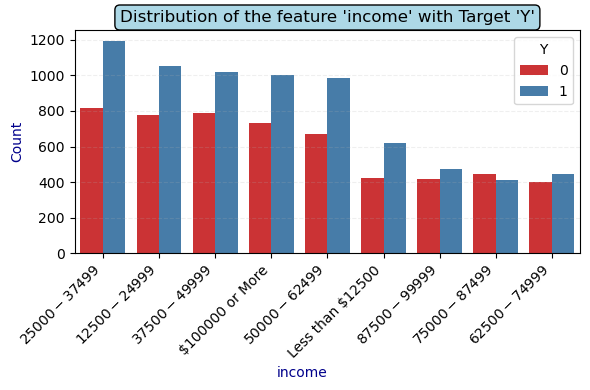

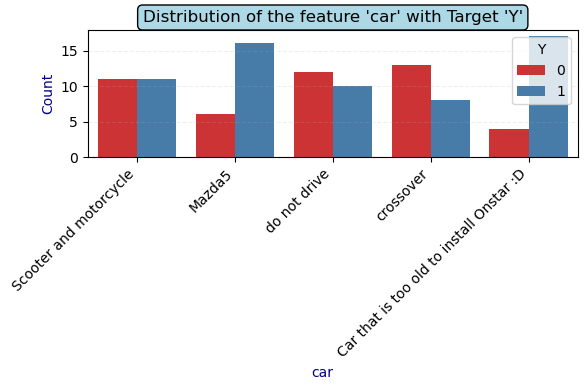

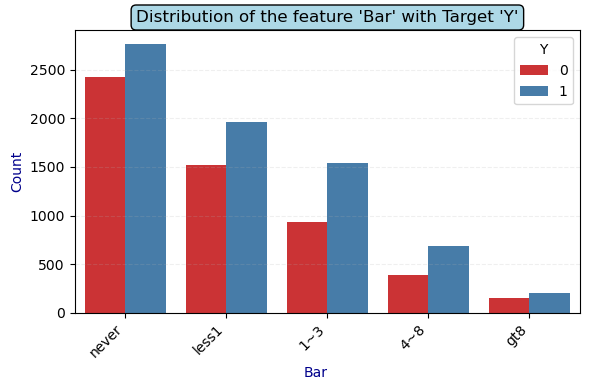

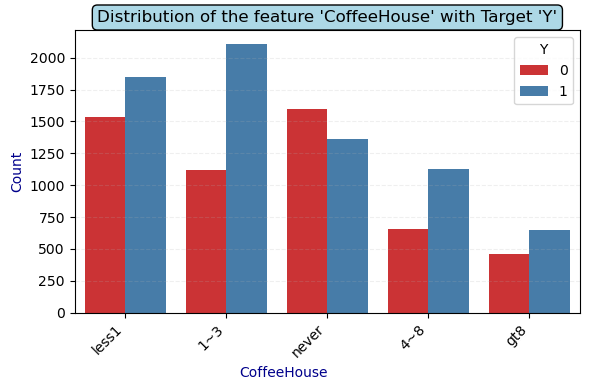

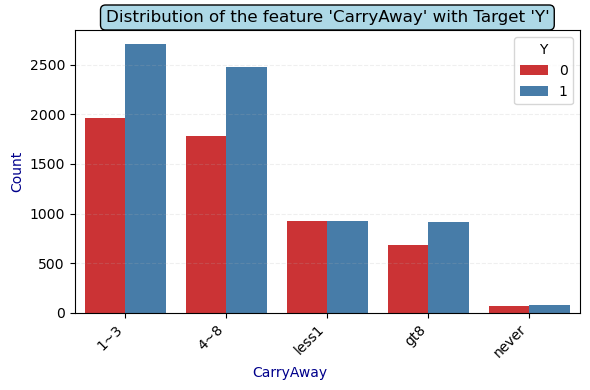

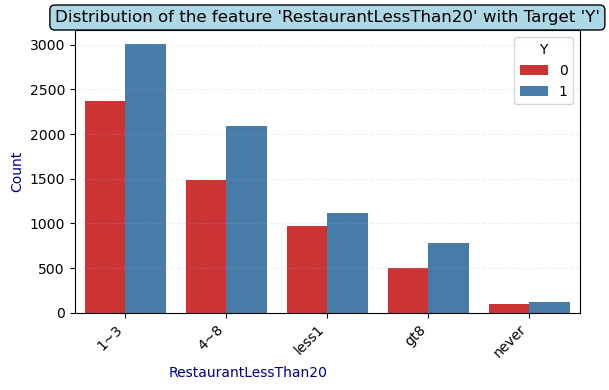

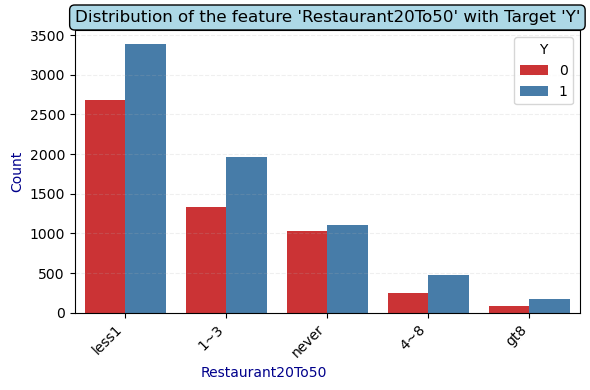

In [9]:
# Loop through each categorical feature to visualize the distribution with Target 'Y' using a count plot
for feature in categorical_features:
    if feature == 'occupation':
        plt.figure(figsize=(26, 10)) # Figure size of 'occupation' feature increased for better visualization
    else:
        plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Y', order=df[feature].value_counts().index, palette='Set1')
    plt.title(f"Distribution of the feature '{feature}' with Target 'Y'", fontsize=12, bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    plt.xlabel(feature, ha='right', color="darkblue")
    plt.ylabel('Count', color="darkblue")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Remarks:**  
The count plots showing the distribution of categorical features with respect to the target variable provide valuable insights into how each feature influences coupon acceptance.

For example, the `destination` feature reveals that 'No Urgent Place' has a higher preference for Target Y = 1 (Yes), while 'Home' and 'Work' show a more balanced distribution between both target classes. Similarly, the `weather` feature indicates that 'Sunny' conditions are more likely to lead to coupon acceptance, while 'Rainy' and 'Snowy' conditions do not show a strong association with either outcome. The `expiration` feature stands out, where the '1d' category shows more favorable outcomes for coupon acceptance compared to the '2h' category, suggesting that longer expiration times may lead to greater acceptance.

These visualizations help in identifying trends and patterns within the data, which can inform the choice of features and the model's behavior during training. They also provide early indicators for possible feature interactions.

-----------------
## F. Preprocessing
Before proceeding with model training, we preprocess the dataset by handling missing values and encoding categorical features. We use pipelines to ensure a structured and reproducible workflow.

### 1. Missing Value Analysis
In this subsection, we start by checking the percentage of missing values in each column.

In [10]:
# Calculate and display the percentage of missing values for each feature
missing_values = df.isnull().mean() * 100
missing_df = missing_values.reset_index()
missing_df.columns = ['Feature', 'Missing Percentage']

# Filter to show only features with missing values
missing_df = missing_df[missing_df['Missing Percentage'] > 0]

# Sort by the missing percentage in descending order and reset the index
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)

# Display the missing data
missing_df

,Feature,Missing Percentage
0,car,99.148534
1,CoffeeHouse,1.710817
2,Restaurant20To50,1.490066
3,CarryAway,1.190476
4,RestaurantLessThan20,1.024913
5,Bar,0.843582


**Remarks:**   
Column `car` will be dropped from the original DataFrame due to high missing value percentage (over 99%). For other categorical columns with less than 2% missing data, the missing values will be imputed with the mode, as it reflects the most frequent value. This imputation will be performed later using a pipeline.

In [11]:
# Drop column 'car' from the original dataframe
df = df.drop(columns=['car'])

Additionally, the columns `toCoupon_GEQ5min` and `direction_same` will be dropped from the original DataFrame, as they were identified as redundant during the EDA of numerical features.

In [12]:
# dropping column 'toCoupon_GEQ5min'
df = df.drop(columns=['toCoupon_GEQ5min'])

# dropping column 'direction_same'
df = df.drop(columns=['direction_same'])

Thus, below is the final list of numerical and categorical features:

In [13]:
# Rewrite the list of numerical features after dropping the 2 columns
numerical_features = df.select_dtypes(include=['int64']).columns
numerical_features

Index(['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_opp', 'Y'],
      dtype='object')

In [14]:
# Rewrite the list of categorical features after dropping the 'car' column
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

### 2. Encoding Categorical Features

In this subsection, to prepare the categorical features for model training, we first analyze their unique value counts. A high number of unique values in categorical columns would significantly increase the number of features if one-hot encoding is applied universally. To balance model dimensionality and interpretability, we use a combination of:
1. **Custom Label Encoding:** Certain categorical and numerical features (which are actually categorical) require specific mappings. Since label encoding is typically used for ordinal variables, where categories have a meaningful order, we customize the labels to ensure a logical ranking among the categories.
2. **One-Hot Encoding:** The remaining categorical features are transformed into dummy variables to maintain interpretability without excessive dimensionality.

Both encoding methods are integrated into a pipeline for efficiency and consistency.

In [15]:
# First check the number of unique values in the categorical columns
unique_categories_df = pd.DataFrame({
    'Categorical Feature Name': categorical_features,
    'Unique Categories': [df[col].nunique() for col in categorical_features]
})
unique_categories_df = unique_categories_df.sort_values(by='Unique Categories', ascending=False).reset_index(drop=True)
unique_categories_df

,Categorical Feature Name,Unique Categories
0,occupation,25
1,income,9
2,age,8
3,education,6
4,maritalStatus,5
5,RestaurantLessThan20,5
6,CarryAway,5
7,CoffeeHouse,5
8,Bar,5
9,Restaurant20To50,5


**Remarks:**    
Based on the unique category counts and the nature of the variables, the `destination`, `coupon`, and `occupation` columns will undergo one-hot encoding, as they are nominal and do not have an inherent order. The remaining categorical columns, where a ranking can be induced due to an inherent order in the categories, will undergo custom label encoding. This will reduce the dimensionality of the dataset.

Additionally, while `temperature` is a numerical feature, it will be treated as categorical and encoded using label encoding. The other numerical features `has_children`, `toCoupon_GEQ15min`, `toCoupon_GEQ25min`, `direction_opp`, and the target variable `Y` are binary (0 or 1). Thus, they do not require label encoding or standardization.

To further improve model performance, the 25 occupation categories will be grouped into 6 broader categories as follows:

- Healthcare & Medical Professions
- Business, Management & Financial
- Education, Social & Community Services
- Technology & Engineering
- Service & Manual Labor
- Unemployed

This grouping will reduce the number of features introduced by one-hot encoding, thereby improving model efficiency.

In [16]:
# Grouping the categories in 'occupation' column
occupation_mapping = {
    "Unemployed" : "Unemployed",
    "Student" : "Unemployed",
    "Computer & Mathematical": "Technology & Engineering",
    "Sales & Related": "Business, Management & Financial",
    "Education&Training&Library": "Education, Social & Community Services",
    "Management": "Business, Management & Financial",
    "Office & Administrative Support": "Business, Management & Financial", 
    "Arts Design Entertainment Sports & Media": "Education, Social & Community Services", 
    "Business & Financial": "Business, Management & Financial", 
    "Retired": "Unemployed", 
    "Food Preparation & Serving Related": "Service & Manual Labor", 
    "Healthcare Practitioners & Technical": "Healthcare & Medical Professions",
    "Healthcare Support": "Healthcare & Medical Professions", 
    "Community & Social Services": "Education, Social & Community Services",
    "Legal": "Business, Management & Financial",  
    "Transportation & Material Moving": "Service & Manual Labor", 
    "Architecture & Engineering": "Technology & Engineering",
    "Personal Care & Service": "Healthcare & Medical Professions",
    "Protective Service": "Service & Manual Labor", 
    "Life Physical Social Science": "Education, Social & Community Services", 
    "Construction & Extraction": "Technology & Engineering",
    "Installation Maintenance & Repair": "Technology & Engineering",
    "Production Occupations": "Technology & Engineering", 
    "Building & Grounds Cleaning & Maintenance": "Service & Manual Labor", 
    "Farming Fishing & Forestry": "Service & Manual Labor"
}

df["occupation"] = df.occupation.map(occupation_mapping)
df["occupation"].unique()

array(['Unemployed', 'Technology & Engineering',
       'Education, Social & Community Services',
       'Healthcare & Medical Professions',
       'Business, Management & Financial', 'Service & Manual Labor'],
      dtype=object)

In [17]:
# List the selected columns for label encoding
custom_label_features = ['temperature', 'passanger', 'weather', 'time', 'expiration', 'gender', 'age', 'maritalStatus', 'education',
                         'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] 

# Create a dictionary 'mapping' where Keys are column names and Values are dictionaries that map categorical values to numerical representations.
mapping = {
        'temperature' : {30:0, 55:1, 80:2}, # Ranked by increasing temperature
        'passanger' : {"Alone":0, "Friend(s)":1, "Partner":1, "Kid(s)":1}, # 0 = Alone or no passenger, 1 = With passenger 
        'weather' : {"Sunny":1, "Rainy":0, "Snowy":0}, # 0 = Bad weather, 1 = Good weather           
        'time' : {"7AM":0, "10AM":0, "2PM":1, "6PM":2, "10PM":2}, # 0 = Morning, 1 = Afternoon, 2 = Evening
        'expiration' : {"1d" : 1, "2h" : 0}, # 0 = Expires in 2h, 1 = Expires in 1d
        'gender' : {"Female" : 1, "Male" : 0}, # 0 = Not Female, 1 = Is Female
        'age' : {"below21":0, "21":1, "26":1, "31":2, "36":2, "41":3, "46":3, "50plus":4}, # Ranked by increasing age groups : 0 = below 21 , 1 = 21-30, 2 = 31-40, 3 = 41-50, 4 = 50 plus
        'maritalStatus' : {"Married partner":1, "Single":0, "Unmarried partner":0, "Divorced" : 0, "Widowed" : 0}, # 0 = No partner, 1 = Partner
        'education' : {"Some college - no degree": 0, "Some High School": 1, "High School Graduate": 1, "Associates degree": 2, 
                       "Bachelors degree": 3, "Graduate degree (Masters or Doctorate)": 4}, # Ranked by increasing education levels
        'income' : {"Less than $12500":0, "$12500 - $24999":1, "$25000 - $37499":2, "$37500 - $49999":3, "$50000 - $62499":4,
                    "$62500 - $74999":5, "$75000 - $87499":6, "$87500 - $99999":7, "$100000 or More":8}, # Ranked by increasing income ranges
        'Bar' : {"never":0, "less1":1, "1~3":2, "4~8":3, "gt8":4}, # Ranked by increasing frequency
        'CoffeeHouse' : {"never":0, "less1":1, "1~3":2, "4~8":3, "gt8":4}, # Ranked by increasing frequency
        'CarryAway' : {"never":0, "less1":1, "1~3":2, "4~8":3, "gt8":4}, # Ranked by increasing frequency
        'RestaurantLessThan20' : {"never":0, "less1":1, "1~3":2, "4~8":3, "gt8":4}, # Ranked by increasing frequency
        'Restaurant20To50' : {"never":0, "less1":1, "1~3":2, "4~8":3, "gt8":4} # Ranked by increasing frequency
    }

# Apply label encoding for each feature in the list
for feature in custom_label_features:
    df[feature] = df[feature].map(mapping[feature])

# Display the updated database
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,Y
0,No Urgent Place,0,1,1,1,Restaurant(<20),1,1,1,0,...,3,0.0,0.0,NaN,3.0,2.0,0,0,1,1
1,No Urgent Place,1,1,2,0,Coffee House,0,1,1,0,...,3,0.0,0.0,NaN,3.0,2.0,0,0,1,0
2,No Urgent Place,1,1,2,0,Carry out & Take away,0,1,1,0,...,3,0.0,0.0,NaN,3.0,2.0,1,0,1,1
3,No Urgent Place,1,1,2,1,Coffee House,0,1,1,0,...,3,0.0,0.0,NaN,3.0,2.0,1,0,1,0
4,No Urgent Place,1,1,2,1,Coffee House,1,1,1,0,...,3,0.0,0.0,NaN,3.0,2.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,1,0,1,2,Carry out & Take away,1,0,1,0,...,6,0.0,0.0,2.0,3.0,2.0,0,0,0,1
12680,Work,0,0,1,0,Carry out & Take away,1,0,1,0,...,6,0.0,0.0,2.0,3.0,2.0,0,0,1,1
12681,Work,0,0,0,0,Coffee House,1,0,1,0,...,6,0.0,0.0,2.0,3.0,2.0,0,0,0,0
12682,Work,0,0,0,0,Bar,1,0,1,0,...,6,0.0,0.0,2.0,3.0,2.0,1,1,1,0


In [18]:
# Summary of the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  int64  
 2   weather               12684 non-null  int64  
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  int64  
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  int64  
 7   gender                12684 non-null  int64  
 8   age                   12684 non-null  int64  
 9   maritalStatus         12684 non-null  int64  
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  int64  
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  int64  
 14  Bar                   12577 non-null  float64
 15  CoffeeHouse        

**Remarks:**   
Label encoding for the selected columns is complete. The dataset retains the same number of missing values in the columns `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, and `Restaurant20To50`, which will be addressed along with One-Hot Encoding in the preprocessing pipeline below.

In [19]:
# Rewrite the list of numerical features after label encoding
numerical_features = df.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['passanger', 'weather', 'temperature', 'time', 'expiration', 'gender',
       'age', 'maritalStatus', 'has_children', 'education', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_opp', 'Y'],
      dtype='object')

In [20]:
# Rewrite the list of categorical features after label encoding
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['destination', 'coupon', 'occupation'], dtype='object')

In [21]:
# Import required libraries for preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Create pipelines for preprocessing
numerical_preprocessor = make_pipeline(
    SimpleImputer(strategy='most_frequent') 
    # Handle missing values with mode because they are categorical values represented as numerical numbers.
    # StandardScaler() is not added to numerical columns because the encoded values represent an order, but the distance between them is not meaningful in terms of scaling.
)

categorical_preprocessor = make_pipeline(
    SimpleImputer(strategy='most_frequent'), # Handle missing values with mode
    OneHotEncoder(sparse_output=False) # sparse=False to tell NumPy not to use sparse matrices when encoding
)

preprocessor = ColumnTransformer([
    ('numerical', numerical_preprocessor, numerical_features),
    ('categorical', categorical_preprocessor, categorical_features)
])

**Remarks:**    
The `ColumnTransformer` effectively applies different preprocessing steps to distinct feature groups. After transformation, the output is a NumPy array. 

Further, to streamline the workflow, preprocessing is performed upfront using the preprocessor pipeline. While preprocessing could also be incorporated directly into the model pipeline, this approach allows the transformation to be applied to the entire dataset in one step, and the transformed dataset is stored in a Pandas DataFrame. This makes it easier to filter and select features for model training while maintaining clarity and flexibility in managing the dataset.

In [22]:
# Preprocess the data using the preprocessor pipeline. 
df_preprocessed = preprocessor.fit_transform(df)

# Get the new feature names after one-hot encoding
# For one-hot encoding, we get a list of column names corresponding to the categorical columns
categorical_columns = preprocessor.transformers_[1][1].named_steps['onehotencoder'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([numerical_features, categorical_columns])

# Convert the transformed data to a DataFrame with the new feature names
df_preproccessed_pd = pd.DataFrame(df_preprocessed, columns=all_feature_names)

# Display information of the transformed DataFrame
df_preproccessed_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   passanger                                          12684 non-null  float64
 1   weather                                            12684 non-null  float64
 2   temperature                                        12684 non-null  float64
 3   time                                               12684 non-null  float64
 4   expiration                                         12684 non-null  float64
 5   gender                                             12684 non-null  float64
 6   age                                                12684 non-null  float64
 7   maritalStatus                                      12684 non-null  float64
 8   has_children                                       12684 non-null  float64
 9   educat

**Remarks:**  
After applying the preprocessing pipeline, all columns are now numerical features due to transformations like one-hot encoding and label encoding for categorical variables. Missing values have also been handled. The transformed data is now a numerical matrix, making it ready for model training.

--------------------------
## G. Identifying Relationships Between Variables Using Heatmap and Correlation Table
This section visualizes the relationships between numerical variables in the dataset, starting with a heatmap to show correlation patterns. Following the heatmap, a table is created to highlight the correlation of each feature with the target variable for better interpretation and analysis.

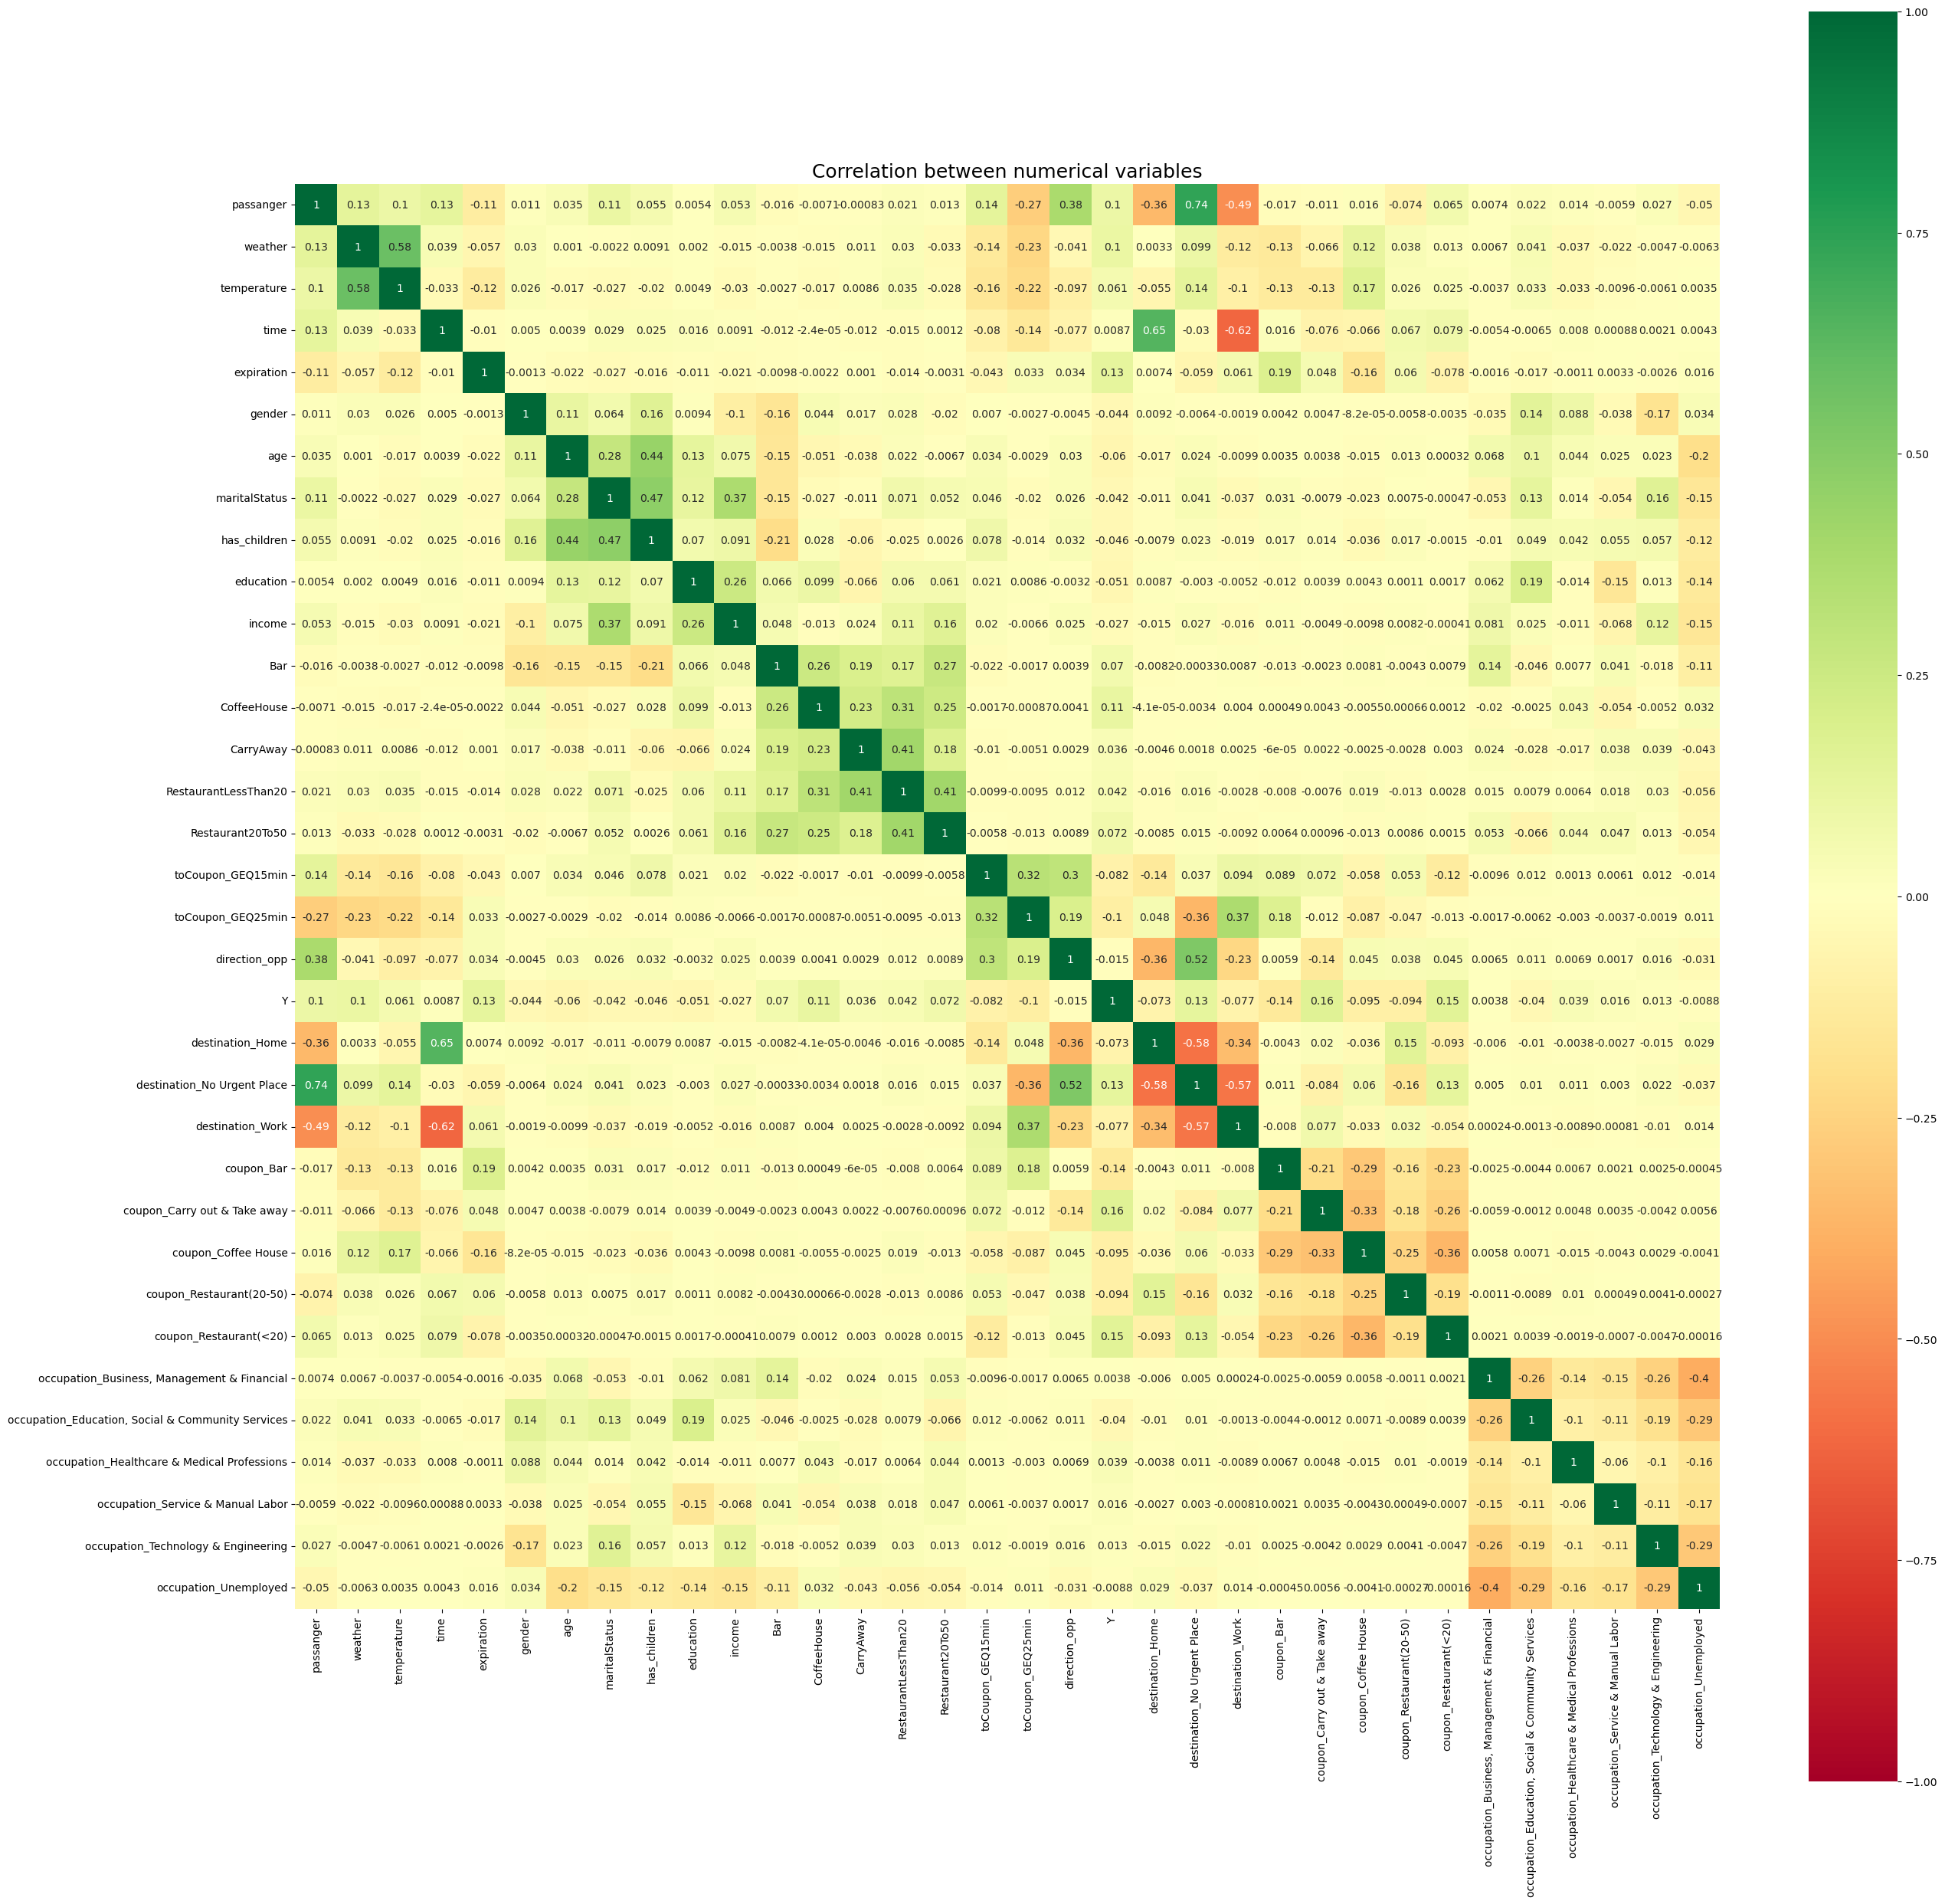

In [23]:
# Compute the correlation matrix for all numerical columns in the final dataframe and plot heatmap.

# Create Correlation Matrix
correlation_matrix = df_preproccessed_pd.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlation_matrix, square=True, annot=True, cmap=plt.cm.RdYlGn, vmin=-1, vmax=1, ax=ax) 
ax.set_title('Correlation between numerical variables', fontsize=18);

**Remarks:**  
The heatmap visually represents the correlation between numerical variables, using a Red-Yellow-Green color scheme:  
- Red (-1): Strong negative correlation  
- Yellow (0): No correlation  
- Green (+1): Strong positive correlation  

Strong positive correlations, such as between `destination_No Urgent Place` and `passanger` (0.74), indicate that these features share similar information, which may be considered for removal or transformation during feature selection. Similarly, strong negative correlations, like `destination_Work` and `time` (-0.62), suggest that an increase in one tends to result in a decrease in the other, which could be useful for model interpretation. Additionally, the presence of multicollinearity, where multiple features exhibit high correlations, may necessitate dimensionality reduction techniques to avoid redundancy and improve model performance.  

Since interpreting exact correlation values from the heatmap can be challenging, a correlation table is generated to provide a clearer view of each feature’s relationship with the target variable.

In [24]:
# Extract the correlation of all columns with the target column
correlation_with_target = correlation_matrix['Y'].sort_values(ascending=False)

# Convert the result to a DataFrame 
correlation_df = correlation_with_target.reset_index()

# Rename columns for clarity
correlation_df.columns = ['Features', 'Correlation with Target Y']
correlation_df

,Features,Correlation with Target Y
0,Y,1.000000
1,coupon_Carry out & Take away,0.162635
2,coupon_Restaurant(<20),0.148542
3,destination_No Urgent Place,0.130702
4,expiration,0.129920
5,CoffeeHouse,0.113466
6,weather,0.104446
7,passanger,0.100299
8,Restaurant20To50,0.072103
9,Bar,0.070034


**Remarks:**  
Some features, such as `occupation_Business, Management & Financial` and `time`, exhibit little to no correlation with the target variable, suggesting they may have limited predictive power. Overall, the correlation values between features and the target variable range from -0.13 to 0.16, indicating weak linear relationships.

--------------------
## H. Model Selection  
This is a classification task, and we have chosen three models for evaluation: **Logistic Regression, Support Vector Classifier (SVC) with Linear and Radial Basis Function (RBF) Kernels**. These models will be assessed using **Nested Cross-Validation (Hold-out and K-Fold Cross-Validation)**. Given the slight class imbalance in the target variable (43-57% split), we will use **F1 Score** as the primary evaluation metric.  

Before model evaluation, we apply **Forward Stepwise Feature Selection** using **SequentialFeatureSelector** from **sklearn** to identify the most relevant features for each model. This helps improve model performance by eliminating irrelevant or redundant features.  

**Note:** We implement classification models using two different approaches:
1. **Pipeline Approach** – For Logistic Regression, we integrate SequentialFeatureSelector into a pipeline and use GridSearchCV to optimize both feature selection and hyperparameters simultaneously.  
2. **Stepwise Approach** – Due to computational constraints, for Logistic Regression, Linear SVC and SVC with RBF, we assume initial hyperparameters, perform Forward Stepwise Feature Selection, and then proceed with hyperparameter tuning.  

Finally, all models are evaluated using Nested Cross-Validation to ensure robust performance assessment.

### Approach 1: Integrated Feature Selection and Hyperparameter Tuning

In this approach, we incorporate Sequential Feature Selection within a pipeline and optimize both feature selection and hyperparameters simultaneously using GridSearchCV. This method ensures that the model selects the most relevant features while finding the best hyperparameter values in a single process. However, due to computational limitations, we apply this method only to Logistic Regression and not to SVC-based models.

Best Hyperparameters: {'logisticregression__C': 0.01}
Selected Features: ['passanger', 'temperature', 'time', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'toCoupon_GEQ25min', 'destination_Home', 'destination_No Urgent Place', 'destination_Work', 'coupon_Coffee House', 'coupon_Restaurant(20-50)', 'occupation_Business, Management & Financial', 'occupation_Service & Manual Labor', 'occupation_Technology & Engineering', 'occupation_Unemployed']

Model Performance on Test Data:
Accuracy: 0.63
Precision: 0.62
Recall: 0.84
F1 Score: 0.72
ROC AUC Score: 0.60


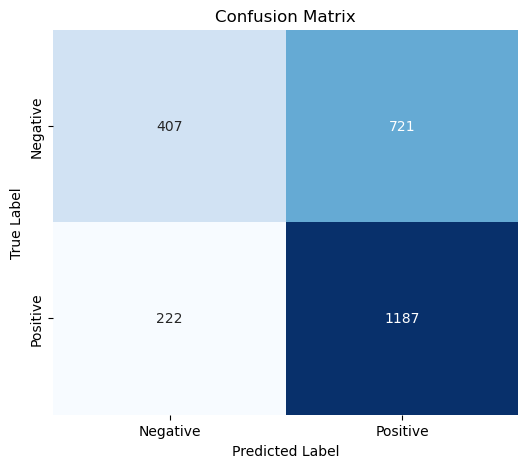

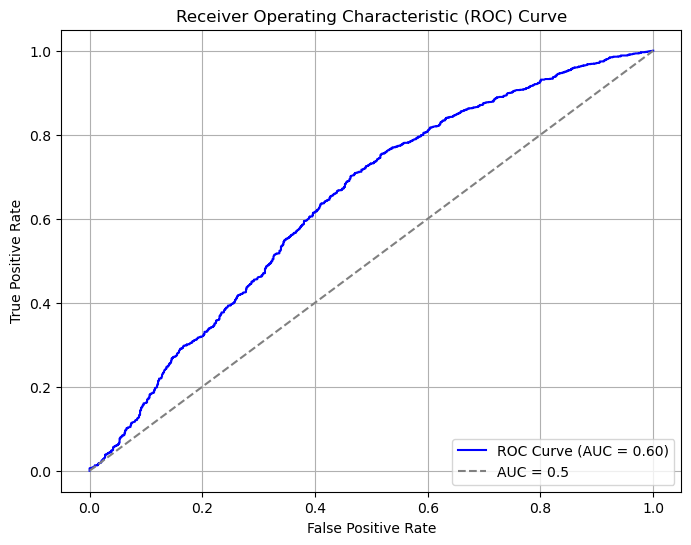

In [25]:
# Logistic Regression
# Import required libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline

# Define features (X) and target (y) using the preprocessed DataFrame.
X = df_preproccessed_pd.drop('Y', axis=1)  # Features
y = df_preproccessed_pd['Y']              # Target

# Split the data into training and testing sets (80% training, 20% testing) and random_state=42 for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define cross-validation strategy for hyperparameter tuning
# Limit n_splits = 3 due to computational constraints. 
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the model with default solver
# Limit iterations to 500 due to computational constraints. 
logreg = LogisticRegression(max_iter=500, random_state=42)

# Apply Forward Feature Selection
sfs = SequentialFeatureSelector(
    estimator=logreg,
    n_features_to_select="auto",  # Automatically determine optimal number of features
    direction="forward",
    scoring="f1",
    cv=3,  # 3-fold cross-validation for feature selection
    n_jobs=-1  # Use all available processors
)

# Define hyperparameter grid
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10]  
    # C is regularization hyperparameter that determines how much the model allows misclassifications in training.
    # We chose C = [0.01, 0.1, 1, 10] to cover a balanced range of regularization strengths, from strong (0.01) to weak (10). 
    # This ensures we explore both under- and over-regularization while maintaining computational efficiency.
}

# Create a pipeline combining SFS and Logistic Regression
pipeline = Pipeline([
    ('feature_selection', sfs),
    ('logisticregression', logreg)
])

# Apply GridSearchCV to optimize both feature selection and hyperparameters together
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1",  
    cv=cv,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best pipeline (with best features and hyperparameters)
best_pipeline = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Extract selected features
selected_features = X_train.columns[best_pipeline.named_steps['feature_selection'].get_support()].tolist()
print("Selected Features:", selected_features)

# Make predictions
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,best_pipeline.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='AUC = 0.5')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Remarks:**

The Logistic Regression model was tuned with the best hyperparameters: `C = 0.01` on a subset of 16 most important features. The model's performance on the test data shows an accuracy of 63%, meaning it correctly predicts the target variable 63% of the time. Precision is at 62%, indicating that 62% of the predicted positive instances are true positives. The recall is high at 84%, which means the model is effective at identifying positive cases. The F1 score of 72% balances precision and recall, suggesting a reasonable trade-off between the two. However, the ROC AUC score of 60% indicates that the model's ability to differentiate between classes is moderate. While the high recall is a positive aspect, the overall accuracy and ROC AUC score suggest that there is potential for further model refinement, possibly through additional feature engineering or exploring alternative modeling approaches.

### Approach 2: Sequential Feature Selection Followed by Hyperparameter Tuning

Due to computational constraints, we adopt a two-step approach :  

1. **Feature Selection**: We perform Forward Stepwise Feature Selection using SequentialFeatureSelector while assuming initial hyperparameter values for all three models (Logistic Regression, Linear SVC, and SVC with RBF). This step helps in identifying the most relevant features for each model individually.  
2. **Hyperparameter Tuning**: Once the optimal feature subsets are selected, we proceed with GridSearchCV to fine-tune the hyperparameters of each model.  

This method ensures that we retain the most predictive features while optimizing model performance, despite computational limitations.

### 1. Feature Selection
To enhance model efficiency and reduce dimensionality, we perform Forward Stepwise Feature Selection. This method iteratively adds the most predictive features, assessing model performance at each step to identify the most informative subset. Each classification model (Logistic Regression, Linear SVC, and SVC with RBF) undergoes independent feature selection to determine the optimal set of features tailored to its learning characteristics.

Assumed Hyperparameters  
Since hyperparameter tuning is deferred to a later stage, we assume reasonable default values:  
- C = 1.0 → A balanced regularization parameter preventing overfitting while maintaining model flexibility.  
- gamma = 'scale' → Adapts dynamically to feature distribution, ensuring a robust starting point for SVM-based models.  

To maintain reproducibility and minimize bias, we apply K-Fold Cross-Validation during feature selection. This ensures that the chosen features generalize well across different training subsets. Once feature selection is finalized, we proceed to hyperparameter tuning and final model evaluation using the selected features.

In [26]:
# Import required libraries
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define features (X) and target (y)
X = df_preproccessed_pd.drop('Y', axis=1)  # Features
y = df_preproccessed_pd['Y']              # Target
X_feature_names = np.array(X.columns)

# Define models with assumed hyperparameters. 
# Fix random_state=42 for reproducibility. 
# Limit iterations to 100 due to computational constraints. 
models = {
    "Logistic Regression": LogisticRegression(C=1.0, random_state=42),
    "Linear SVC": SVC(kernel='linear', C=1.0, random_state=42, max_iter=100),
    "SVC with RBF": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, max_iter=100)
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform feature selection for each model
selected_features = {}

for model_name, model in models.items():
    sfs = SequentialFeatureSelector(
        model, 
        n_features_to_select="auto",  # Automatically selects optimal number
        direction="forward", 
        scoring="f1",  # Optimize for F1 score
        cv=cv, 
        n_jobs=-1  # Use all available CPU cores
    )
    
    # Fit the feature selector to the transformed data (after preprocessing)
    sfs.fit(X, y)  # Fit feature selector
    
    # Store the selected features based on the feature selector
    selected_indices = sfs.get_support(indices=True)
    
    # Map selected indices to the original feature names
    selected_features[model_name] = X_feature_names[selected_indices].tolist()
    
    # Print the selected feature names for each model
    print(f"{model_name}: Selected Features: {selected_features[model_name]}\n")

Logistic Regression: Selected Features: ['passanger', 'temperature', 'time', 'Bar', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'destination_Home', 'coupon_Bar', 'coupon_Restaurant(20-50)', 'occupation_Business, Management & Financial', 'occupation_Education, Social & Community Services', 'occupation_Healthcare & Medical Professions', 'occupation_Service & Manual Labor', 'occupation_Technology & Engineering', 'occupation_Unemployed']

Linear SVC: Selected Features: ['passanger', 'weather', 'temperature', 'time', 'expiration', 'gender', 'maritalStatus', 'toCoupon_GEQ25min', 'direction_opp', 'destination_Work', 'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Restaurant(<20)', 'occupation_Education, Social & Community Services', 'occupation_Technology & Engineering', 'occupation_Unemployed']

SVC with RBF: Selected Features: ['weather', 'temperature', 'has_children', 'education', 'toCoupon_GEQ15min', 'destination_Work', 'coupon_Bar', 'coupon_Coffee House', 'coupon_Resta

### 2. Hyperparameter Tuning
After selecting the optimal features through the previous step, we proceed with hyperparameter tuning to further enhance model performance. Using GridSearchCV, we perform an exhaustive search over a predefined hyperparameter grid to find the best combination for each model (Logistic Regression, Linear SVC, and SVC with RBF). This process refines model parameters to maximize predictive power.

We employ Nested Cross-Validation (Hold-out and K-Fold Cross-Validation) to ensure robust and unbiased performance evaluation. This approach helps assess how well the models generalize to unseen data by testing across multiple folds and using a separate validation set for hyperparameter tuning.

The final evaluation is based on the F1 Score, chosen for the balance between precision and recall, especially in the presence of a slight class imbalance. Once the best hyperparameters are found, the models are retrained and evaluated to determine the optimal configuration for accurate predictions.

### Logistic Regression  
Logistic Regression is a widely used linear classification algorithm that predicts the probability of an instance belonging to a particular class using the logistic (sigmoid) function. As a foundational model, it is especially effective for binary classification tasks and provides a solid baseline due to its simplicity, interpretability, and computational efficiency.  

In this project, we implement Logistic Regression after carefully preprocessing the data and selecting the most relevant features for the model. Logistic Regression serves as a reliable benchmark, allowing us to compare the performance with more complex models like Linear SVC and SVC with RBF.

Best Hyperparameters: {'C': 0.01, 'solver': 'liblinear'}

Model Performance on Test Data:
Accuracy: 0.62
Precision: 0.61
Recall: 0.86
F1 Score: 0.71
ROC AUC Score: 0.59


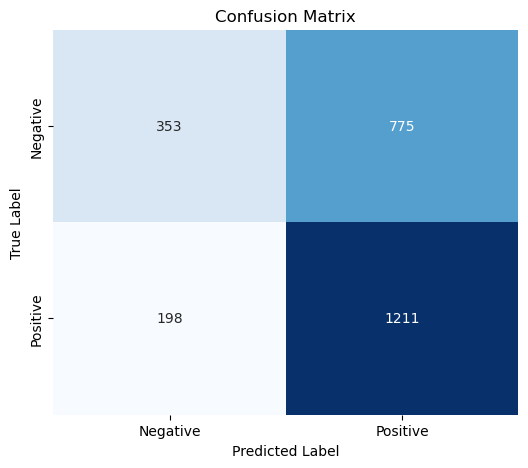

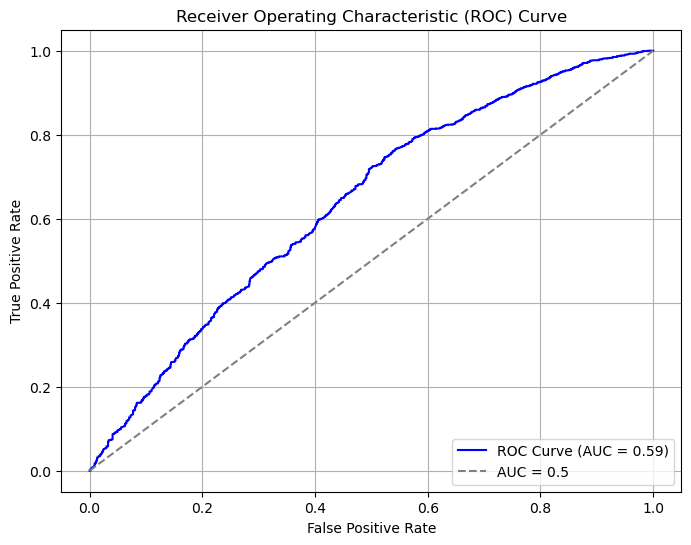

In [27]:
# Logistic Regression with Nested Cross Validation for the features selected beforehand.
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Split the data into training and testing sets (80% training, 20% testing) using selected features.
X_train, X_test, y_train, y_test = train_test_split(X[selected_features["Logistic Regression"]], y, test_size=0.2, random_state=42, shuffle=True)

# Define cross-validation strategy for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
model = LogisticRegression(random_state=42)

# Define hyperparameter grid for tuning 
param_grid = {
    "C": [0.01, 0.1, 1, 10],  
    # C is regularization hyperparameter that determines how much the model allows misclassifications in training.
    # We chose C = [0.01, 0.1, 1, 10] to cover a balanced range of regularization strengths, from strong (0.01) to weak (10). 
    # This ensures we explore both under- and over-regularization while maintaining computational efficiency.
    "solver": ["lbfgs", "liblinear"]  
    # The "lbfgs" solver is chosen as it is efficiency in handling large datasets
    # while "liblinear" is preferred for smaller datasets or when dealing with binary classification tasks, providing faster convergence.
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the final model with the best hyperparameters using the pipeline
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)
logreg_roc_auc = roc_auc_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"Accuracy: {logreg_accuracy:.2f}")
print(f"Precision: {logreg_precision:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"F1 Score: {logreg_f1:.2f}")
print(f"ROC AUC Score: {logreg_roc_auc:.2f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test,best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, color='blue', label=f'ROC Curve (AUC = {logreg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='AUC = 0.5')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Remarks:**

The Logistic Regression model was tuned with the best hyperparameters: `C = 0.01` and `solver = 'liblinear'`. The model's performance on the test data shows an accuracy of 62%, meaning it correctly predicts the target variable 62% of the time. Precision is at 61%, indicating that 61% of the predicted positive instances are true positives. The recall is high at 86%, which means the model is effective at identifying positive cases. The F1 score of 71% balances precision and recall, suggesting a reasonable trade-off between the two. However, the ROC AUC score of 59% indicates that the model's ability to differentiate between classes is moderate. While the high recall is a positive aspect, the overall accuracy and ROC AUC score suggest that there is potential for further model refinement, possibly through additional feature engineering or exploring alternative modeling approaches.

### Linear SVC

Next, we apply a Linear Support Vector Classifier (SVC) model on preprocessed data and selected features. Linear SVC is chosen due to its effectiveness in high-dimensional spaces and ability to handle non-linear decision boundaries when using appropriate kernels. The model is then trained on the selected features, and performance is evaluated using various metrics such as accuracy, precision, recall, F1 score, and ROC AUC score. The confusion matrix and ROC curve are also plotted for further model assessment.

Best Hyperparameters: {'C': 0.01}

Model Performance on Test Data:
Accuracy: 0.66
Precision: 0.66
Recall: 0.80
F1 Score: 0.72
ROC AUC Score: 0.64


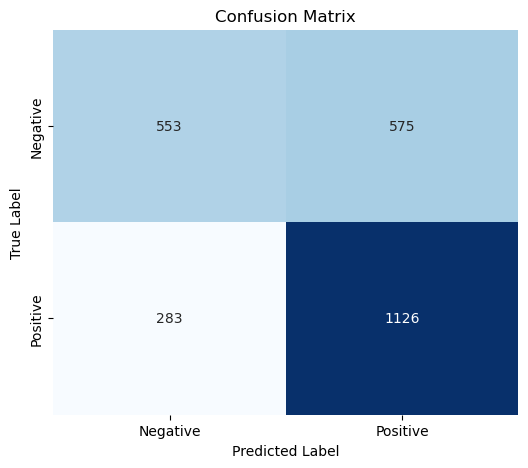

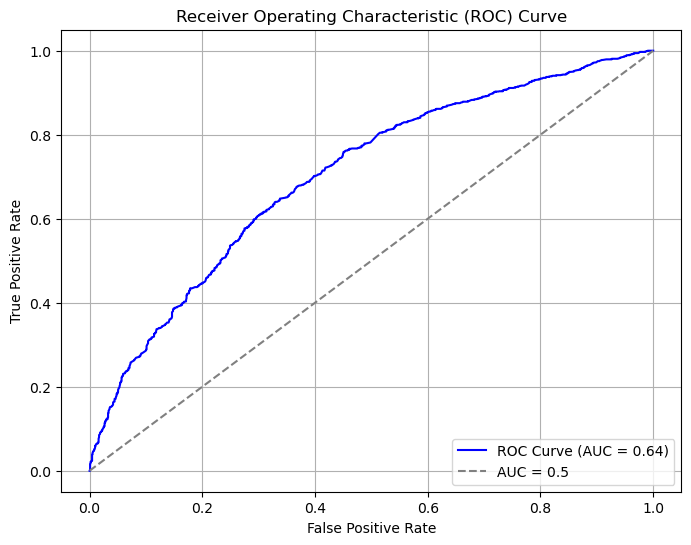

In [28]:
# Linear SVC with Nested Cross Validation for the features selected beforehand.
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Split the data into training and testing sets (80% training, 20% testing) using selected features.
X_train, X_test, y_train, y_test = train_test_split(X[selected_features["Linear SVC"]], y, test_size=0.2, random_state=42, shuffle=True)

# Define cross-validation strategy for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
model = SVC(kernel='linear', random_state=42, probability=True)

# Define hyperparameter grid for tuning 
param_grid = {
    "C": [0.01, 0.1, 1, 10]  
    # C is regularization hyperparameter that determines how much the model allows misclassifications in training.
    # We chose C = [0.01, 0.1, 1, 10] to cover a balanced range of regularization strengths, from strong (0.01) to weak (10). 
    # This ensures we explore both under- and over-regularization while maintaining computational efficiency.
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the final model with the best hyperparameters using the pipeline
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
linearsvc_accuracy = accuracy_score(y_test, y_pred)
linearsvc_precision = precision_score(y_test, y_pred)
linearsvc_recall = recall_score(y_test, y_pred)
linearsvc_f1 = f1_score(y_test, y_pred)
linearsvc_roc_auc = roc_auc_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"Accuracy: {linearsvc_accuracy:.2f}")
print(f"Precision: {linearsvc_precision:.2f}")
print(f"Recall: {linearsvc_recall:.2f}")
print(f"F1 Score: {linearsvc_f1:.2f}")
print(f"ROC AUC Score: {linearsvc_roc_auc:.2f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
linearsvc_fpr, linearsvc_tpr, linearsvc_thresholds = roc_curve(y_test,best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(linearsvc_fpr, linearsvc_tpr, color='blue', label=f'ROC Curve (AUC = {linearsvc_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='AUC = 0.5')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Remarks:**

The Linear SVC model's performance with the best hyperparameters (`C : 1`) indicates that it is performing reasonably well. The accuracy score of 66% is relatively low, suggesting that the model might not be capturing all patterns in the data effectively. However, the model has a high recall of 80%, which means it does a good job identifying positive instances, though this comes at the cost of a lower precision of 66%, indicating some false positives. The F1 score of 72% balances precision and recall, showing that the model is moderately successful in classifying the target variable overall. The ROC AUC score of 64%, which suggests that the model’s ability to discriminate between the classes is moderate. Fine-tuning the model with additional feature engineering or more advanced hyperparameter optimization could help improve performance.

### SVC with RBF kernel
In this section, we apply Support Vector Classifier (SVC) with the Radial Basis Function (RBF) kernel to classify the dataset. The RBF kernel is chosen for its ability to handle non-linear decision boundaries by mapping data into a higher-dimensional space, where it can effectively separate complex patterns. SVC with RBF is ideal for datasets where relationships between features and the target variable are not linearly separable. This model is particularly useful for high-dimensional data, offering a flexible approach for accurate classification and robust performance even with outliers.

Best Hyperparameters: {'C': 0.1}

Model Performance on Test Data:
Accuracy: 0.63
Precision: 0.63
Recall: 0.80
F1 Score: 0.70
ROC AUC Score: 0.61


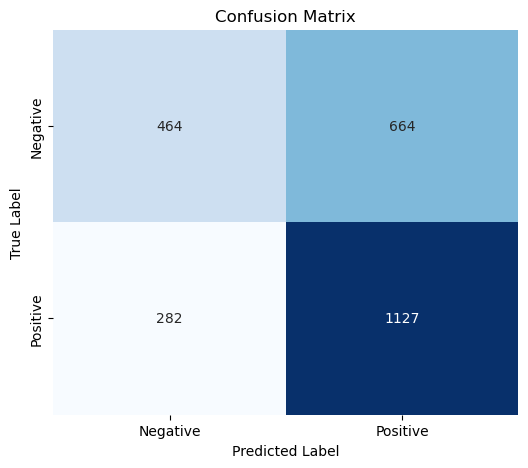

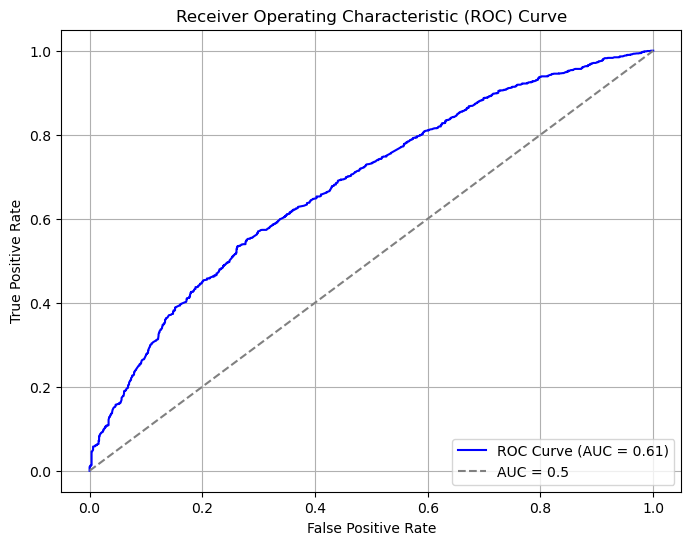

In [29]:
# SVM with RBF kernel with Nested Hold-out and K-fold Cross Validation for the features selected beforehand.
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Split the data into training and testing sets (80% training, 20% testing) using selected features.
X_train, X_test, y_train, y_test = train_test_split(X[selected_features["SVC with RBF"]], y, test_size=0.2, random_state=42, shuffle=True)

# Define cross-validation strategy for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
model = SVC(kernel='rbf', random_state=42, probability=True)

# Define hyperparameter grid for tuning 
param_grid = {
    "C": [0.1, 1, 10]  
    # C is regularization hyperparameter that determines how much the model allows misclassifications in training.
    # We chose C = [0.1, 1, 10] to cover a balanced range of regularization strengths, from strong (0.1) to weak (10). 
    # This ensures we explore both under- and over-regularization while maintaining computational efficiency.
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the final model with the best hyperparameters using the pipeline
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
svc_rbf_accuracy = accuracy_score(y_test, y_pred)
svc_rbf_precision = precision_score(y_test, y_pred)
svc_rbf_recall = recall_score(y_test, y_pred)
svc_rbf_f1 = f1_score(y_test, y_pred)
svc_rbf_roc_auc = roc_auc_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"Accuracy: {svc_rbf_accuracy:.2f}")
print(f"Precision: {svc_rbf_precision:.2f}")
print(f"Recall: {svc_rbf_recall:.2f}")
print(f"F1 Score: {svc_rbf_f1:.2f}")
print(f"ROC AUC Score: {svc_rbf_roc_auc:.2f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
svc_rbf_fpr, svc_rbf_tpr, svc_rbf_thresholds = roc_curve(y_test,best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(svc_rbf_fpr, svc_rbf_tpr, color='blue', label=f'ROC Curve (AUC = {svc_rbf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='AUC = 0.5')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Remarks:**  
The SVC with RBF Kernel delivers a balanced performance, achieving 63% accuracy, 63% precision, 80% recall, and 70% F1 score. While the recall (80%) is relatively high, indicating that it correctly identifies a majority of positive cases, it comes at the cost of lower precision, meaning it also misclassifies some negative cases as positives. The ROC AUC score (61%) suggests that the model has a moderate ability to differentiate between the classes.

## I. Comparison of the models

In [30]:
# Creating a dictionary with model metrics
model_results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"],
    "Logistic Regression" : [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_roc_auc],
    "Linear SVC": [linearsvc_accuracy, linearsvc_precision, linearsvc_recall, linearsvc_f1, linearsvc_roc_auc],
    "SVC with RBF": [svc_rbf_accuracy, svc_rbf_precision, svc_rbf_recall, svc_rbf_f1, svc_rbf_roc_auc]
}

# Creating a DataFrame
df_results = pd.DataFrame(model_results)

# Display the table
df_results.round(decimals=2)


,Metric,Logistic Regression,Linear SVC,SVC with RBF
0,Accuracy,0.62,0.66,0.63
1,Precision,0.61,0.66,0.63
2,Recall,0.86,0.80,0.80
3,F1 Score,0.71,0.72,0.70
4,ROC AUC Score,0.59,0.64,0.61


From the results, **Linear SVC** emerges as the best-performing model, achieving the highest accuracy (66%), precision (66%), and F1 score (72%). The **ROC AUC score (64%)** is also the highest, indicating a relatively stronger ability to distinguish between classes. This suggests that Linear SVC is the most effective classifier among the three tested models.

**Logistic Regression** and **SVC with RBF Kernel** exhibit similar performance, with Logistic Regression showing the highest recall (86%), meaning it identifies more true positives but at the cost of lower precision. On the other hand, **SVC with RBF Kernel** maintains a more balanced performance across all metrics but does not significantly outperform the other models in any specific area.

To further analyze the model's discriminative ability, we have plotted the **ROC-AUC curves** below, providing a visual representation of how well each model separates the two classes.

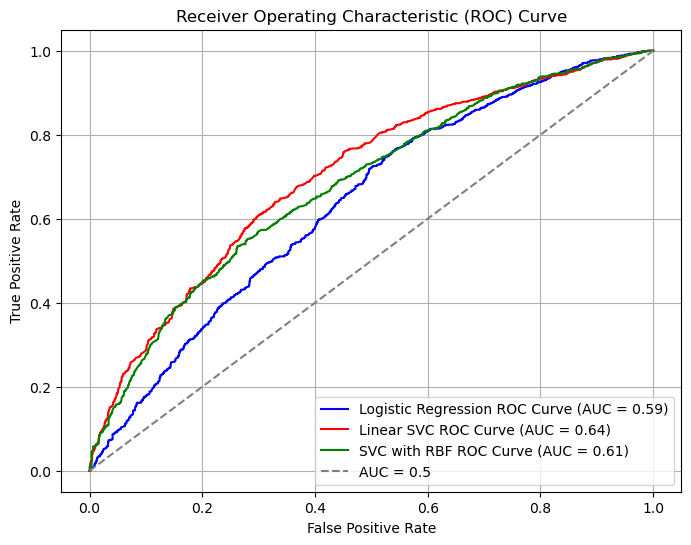

In [31]:
# Compare models with ROC-AUC Curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, color='blue', label=f'Logistic Regression ROC Curve (AUC = {logreg_roc_auc:.2f})')
plt.plot(linearsvc_fpr, linearsvc_tpr, color='red', label=f'Linear SVC ROC Curve (AUC = {linearsvc_roc_auc:.2f})')
plt.plot(svc_rbf_fpr, svc_rbf_tpr, color='green', label=f'SVC with RBF ROC Curve (AUC = {svc_rbf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='AUC = 0.5')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## J. Conclusion 
Considering the performance across all metrics, Linear SVC emerges as the best model for this classification task. Linear SVC's higher precision and balanced recall make it a reliable choice, especially when misclassification costs are equally weighted. However, if recall is a priority (e.g., ensuring fewer false negatives), Logistic Regression could be a better alternative. Further improvements can be explored through advanced feature engineering, hyperparameter tuning, or ensemble methods.

## K. Future Developments
While the current models provide valuable insights into classification performance, several enhancements can be explored to improve predictive accuracy and generalization:

- Feature Engineering: Additional feature transformations, interactions, or domain-specific engineered features may help improve model performance.
- Advanced Model Architectures: Exploring tree-based models such as Random Forest, XGBoost, or ensemble techniques may provide better predictive capabilities.
- Hyperparameter Optimization: More extensive tuning using Bayesian Optimization or Genetic Algorithms could lead to further improvements in model performance.
- Handling Class Imbalance: Implementing techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or cost-sensitive learning could address potential biases in classification.
- Neural Networks: Deep learning models, particularly feedforward neural networks, may be explored for better feature learning if computational resources allow.
- Alternative Evaluation Strategies: Examining Precision-Recall curves and threshold tuning could further refine model selection for real-world deployment.
  
These developments can enhance the model’s robustness, interpretability, and real-world applicability.